In [1]:
import pandas as pd
import numpy as np
import wrds
import seaborn as sns
import os
import io
import dateutil
import collections
import time
from datetime import datetime
#import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
#report using IS and BS ratios and explain teh reasoning behind each ratio and why a change in that raio can affect
#earnings

In [3]:
#use all the companies
# add AR, Inv, as features
#loop the whole plotting process and save as png

In [4]:
db= wrds.Connection(wrds_username='serqas23')


/Users/sergesondji/anaconda2/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Enter your WRDS username [sergesondji]:serqas23
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [5]:
list_libraries = db.list_libraries()


In [6]:
Start_year = 1980
End_year = 2018

In [7]:
Query_string ="select gvkey,fyear,conm,act,ap,invt,lct,ebit,at,bkvlps,cogs,dvt,ib,lt,ni,revt,seq from comp.funda where gvkey='005073' OR gvkey='009563' OR gvkey='006066' OR gvkey='007875' OR gvkey='002176' OR gvkey='009667' OR gvkey='005047' OR gvkey='004839' OR gvkey='003022'  OR gvkey='006307' OR gvkey='011259'OR gvkey='007585' OR gvkey='005606' OR gvkey='003282' OR gvkey='005680' OR gvkey='006829' OR gvkey='004503'  OR gvkey='009899' OR gvkey='002176' OR gvkey='002136' OR gvkey='009653' OR gvkey='003813' OR gvkey='002991'"

In [8]:
Full_db = db.raw_sql(Query_string)


In [9]:
years = list(range(Start_year,End_year))

In [10]:
DBfrom1980to2017 = Full_db[Full_db.fyear.isin(years)]

In [11]:
gvkeylist = set(DBfrom1980to2017['gvkey'].tolist())



In [12]:
DBfrom1980to2017nonans = DBfrom1980to2017.dropna(axis=0, how='any')



1. AT -- Assets 
2. Total BKVLPS 
3. Book Value Per Share
4. COGS -- Cost of Goods Sold 
5. DVT -- Dividends - Total
6. IB -- Income Before Extraordinary Items 
7. LT -- Liabilities - Total
8. NI -- Net Income (Loss) 
9. REVT -- Revenue - Total SALE -- Sales/Turnover (Net)
10. SEQ -- Stockholders' Equity - Total
11. ACT -- Current Assets
12. Ap -- Account Payable
13. ARTFS --- Account receivable*
14. invt -- Inventory
15. lct -- Current Liabilities
16.
17.
18.
19.
20.



In [13]:
DBfrom1980to2017nonans = DBfrom1980to2017nonans.reset_index(drop=True)
DBfrom1980to2017nonans.head()


gvkey   fyear                        conm       act      ap   invt  \
0  002136  1984.0  VERIZON COMMUNICATIONS INC  2600.400  1290.7  121.8   
1  002136  1985.0  VERIZON COMMUNICATIONS INC  2683.699  1227.1  242.3   
2  002136  1986.0  VERIZON COMMUNICATIONS INC  2755.600  1292.2  270.9   
3  002136  1987.0  VERIZON COMMUNICATIONS INC  2796.600  1523.6  298.6   
4  002136  1988.0  VERIZON COMMUNICATIONS INC  3206.400  1622.3  316.5   

        lct      ebit         at   bkvlps      cogs    dvt      ib         lt  \
0  2741.200  2114.780  18684.203  75.3744  4781.371  628.8   973.1  11175.799   
1  2831.899  2331.899  19788.305  79.3134  5288.445  678.7  1092.9  11867.095   
2  3593.800  2470.901  21090.805  41.8186  5576.496  717.3  1167.1  12770.197   
3  3183.800  2357.000  21245.100  44.1303  5860.800  762.3  1240.4  12503.200   
4  4265.200  2406.600  24729.200  46.5787  6119.500  806.3  1316.8  15552.500   

       ni       revt       seq  
0   973.1   8090.051  7508.499  
1  1092.9   9084.145  7921.270  
2  1167.1   9920.797  8320.697  
3  1240.4  10298.400  8741.900  
4  1316.8  10880.100  9176.700

## PCA Absolute values

In [14]:
# not using sale because it is the same feature as revenue 'revt'
features = ['at', 'bkvlps', 'cogs', 'dvt','ib','lt','ni','revt','seq', 'act', 'ap', 'invt','lct', 'ebit']
# Separating out the features
x = DBfrom1980to2017nonans.loc[:, features].values
#Standardizing the features
x = StandardScaler().fit_transform(x)

In [15]:
pca = PCA(n_components=2)
principalcomp= pca.fit_transform(x)
principalDF= pd.DataFrame (data=principalcomp, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF.head()


Principal Component 1  Principal Component 2
0              -1.865788              -0.344629
1              -1.823800              -0.354241
2              -1.774843              -0.364724
3              -1.759634              -0.362545
4              -1.681437              -0.390131

In [16]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.69374214 0.09545596]


In [17]:
FinalDF= pd.concat([principalDF,DBfrom1980to2017nonans[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF.head()


Principal Component 1  Principal Component 2  \
175              -1.400036               0.666114   
284              -1.026372              -0.478158   
574              -2.412147              -0.108542   
137               1.060266               0.456504   
34               -1.049057               0.144093   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

## Euclidian Distance

In [18]:
#look for code for shell company for oil 
CompanyList=set(DBfrom1980to2017nonans['conm'].tolist())
CompanyList

{u'AT&T INC',
 u'CHEVRON CORP',
 u'CHRYSLER CORP',
 u'COMPAQ COMPUTER CORP',
 u'EXXON MOBIL CORP',
 u'FORD MOTOR CO',
 u'GENERAL ELECTRIC CO',
 u'GENERAL MOTORS CO',
 u'HOME DEPOT INC',
 u'HP INC',
 u'INTL BUSINESS MACHINES CORP',
 u"LOWE'S COMPANIES INC",
 u'MOTOROLA SOLUTIONS INC',
 u'NEWELL BRANDS INC',
 u'SEARS HOLDINGS CORP',
 u'SEARS ROEBUCK & CO',
 u'SHELL OIL CO',
 u'SHERWIN-WILLIAMS CO',
 u'TARGET CORP',
 u'VERIZON COMMUNICATIONS INC',
 u'WALMART INC'}

In [19]:
Telecommunication = ['AT&T INC','VERIZON COMMUNICATIONS INC','MOTOROLA SOLUTIONS INC']
Oil = ['CHEVRON CORP','SHELL OIL CO','EXXON MOBIL CORP']
Auto =['CHRYSLER CORP','FORD MOTOR CO','GENERAL MOTORS CO']
Hardware = ["LOWE'S COMPANIES INC",'SHERWIN-WILLIAMS CO','HOME DEPOT INC']
Retail = ['WALMART INC','SEARS ROEBUCK & CO','TARGET CORP']
Conglomerate = ['GENERAL ELECTRIC CO','NEWELL BRANDS INC','BERKSHIRE HATHAWAY']
Computer = ['INTL BUSINESS MACHINES CORP','COMPAQ COMPUTER CORP','HP INC']

## Oil Plot

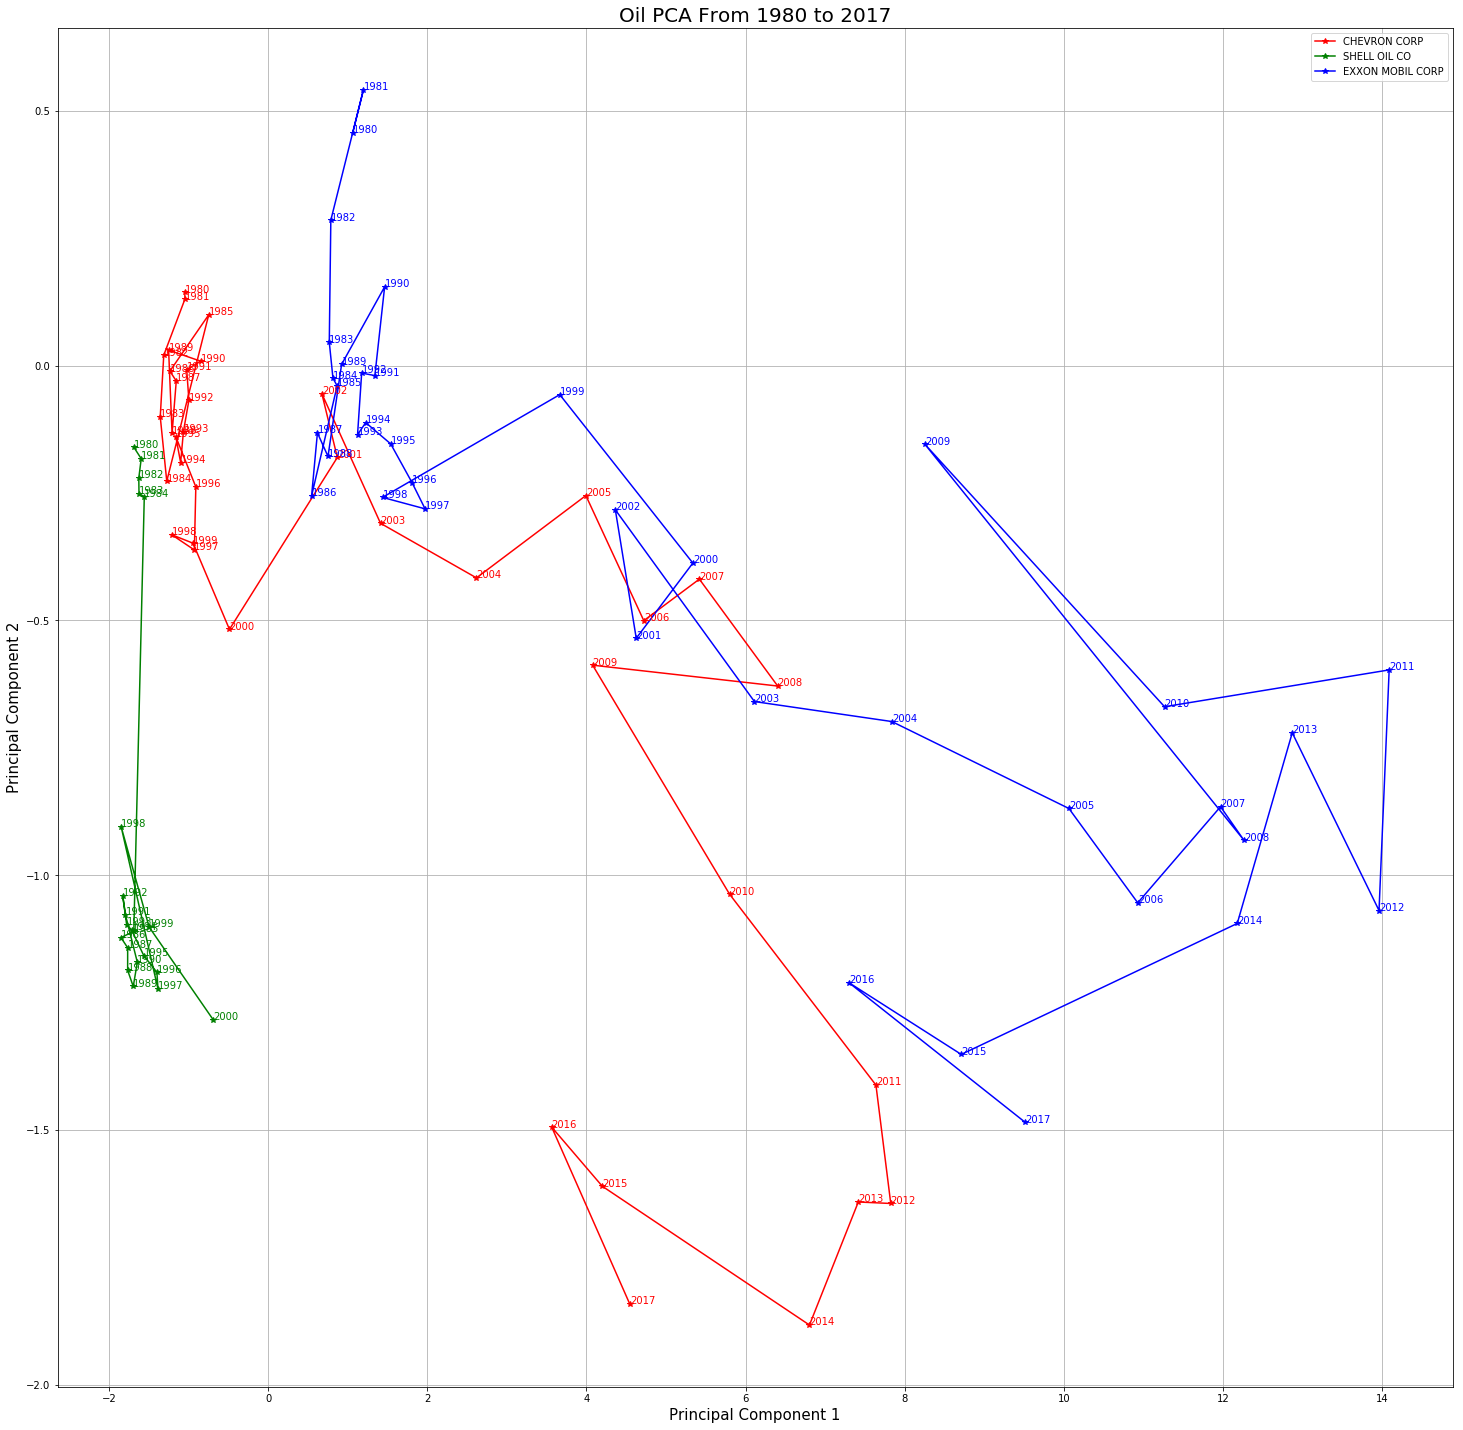

In [20]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

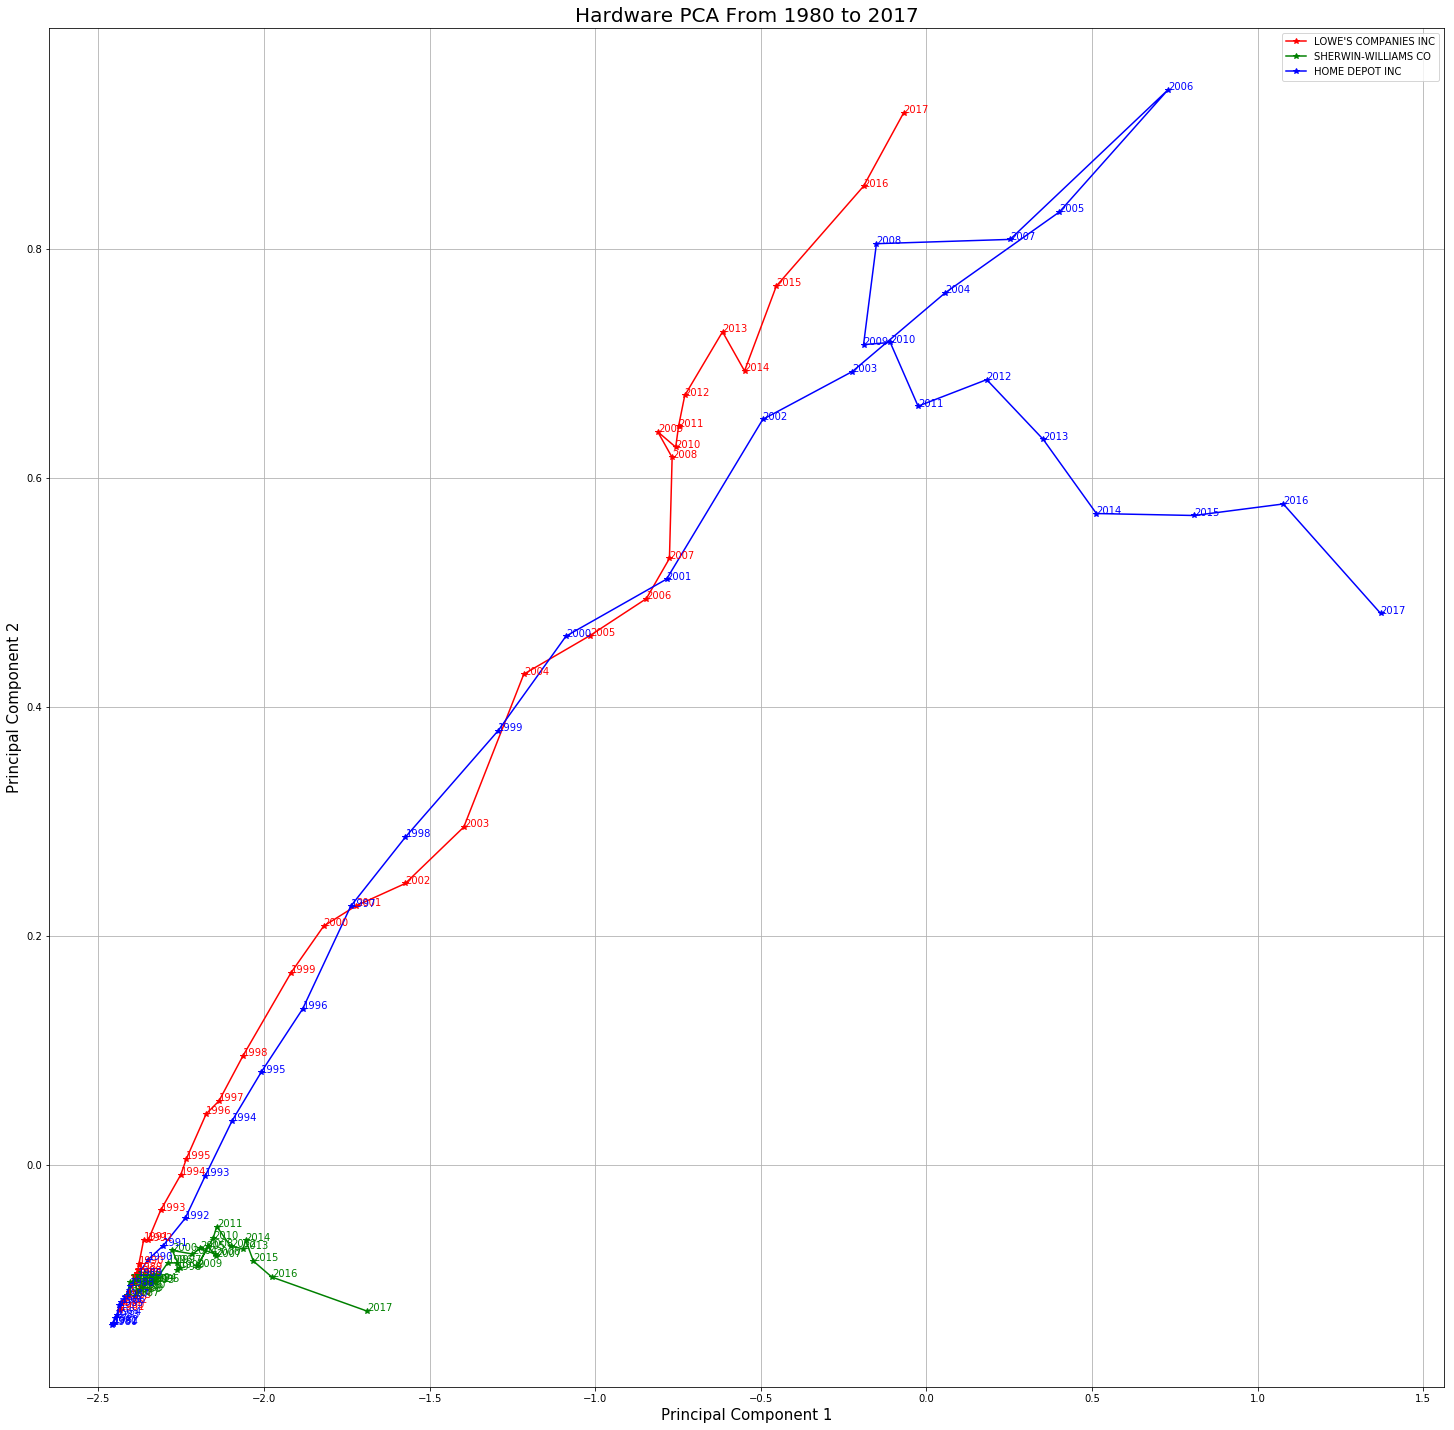

In [21]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware PCA From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Telecommunication Plot 

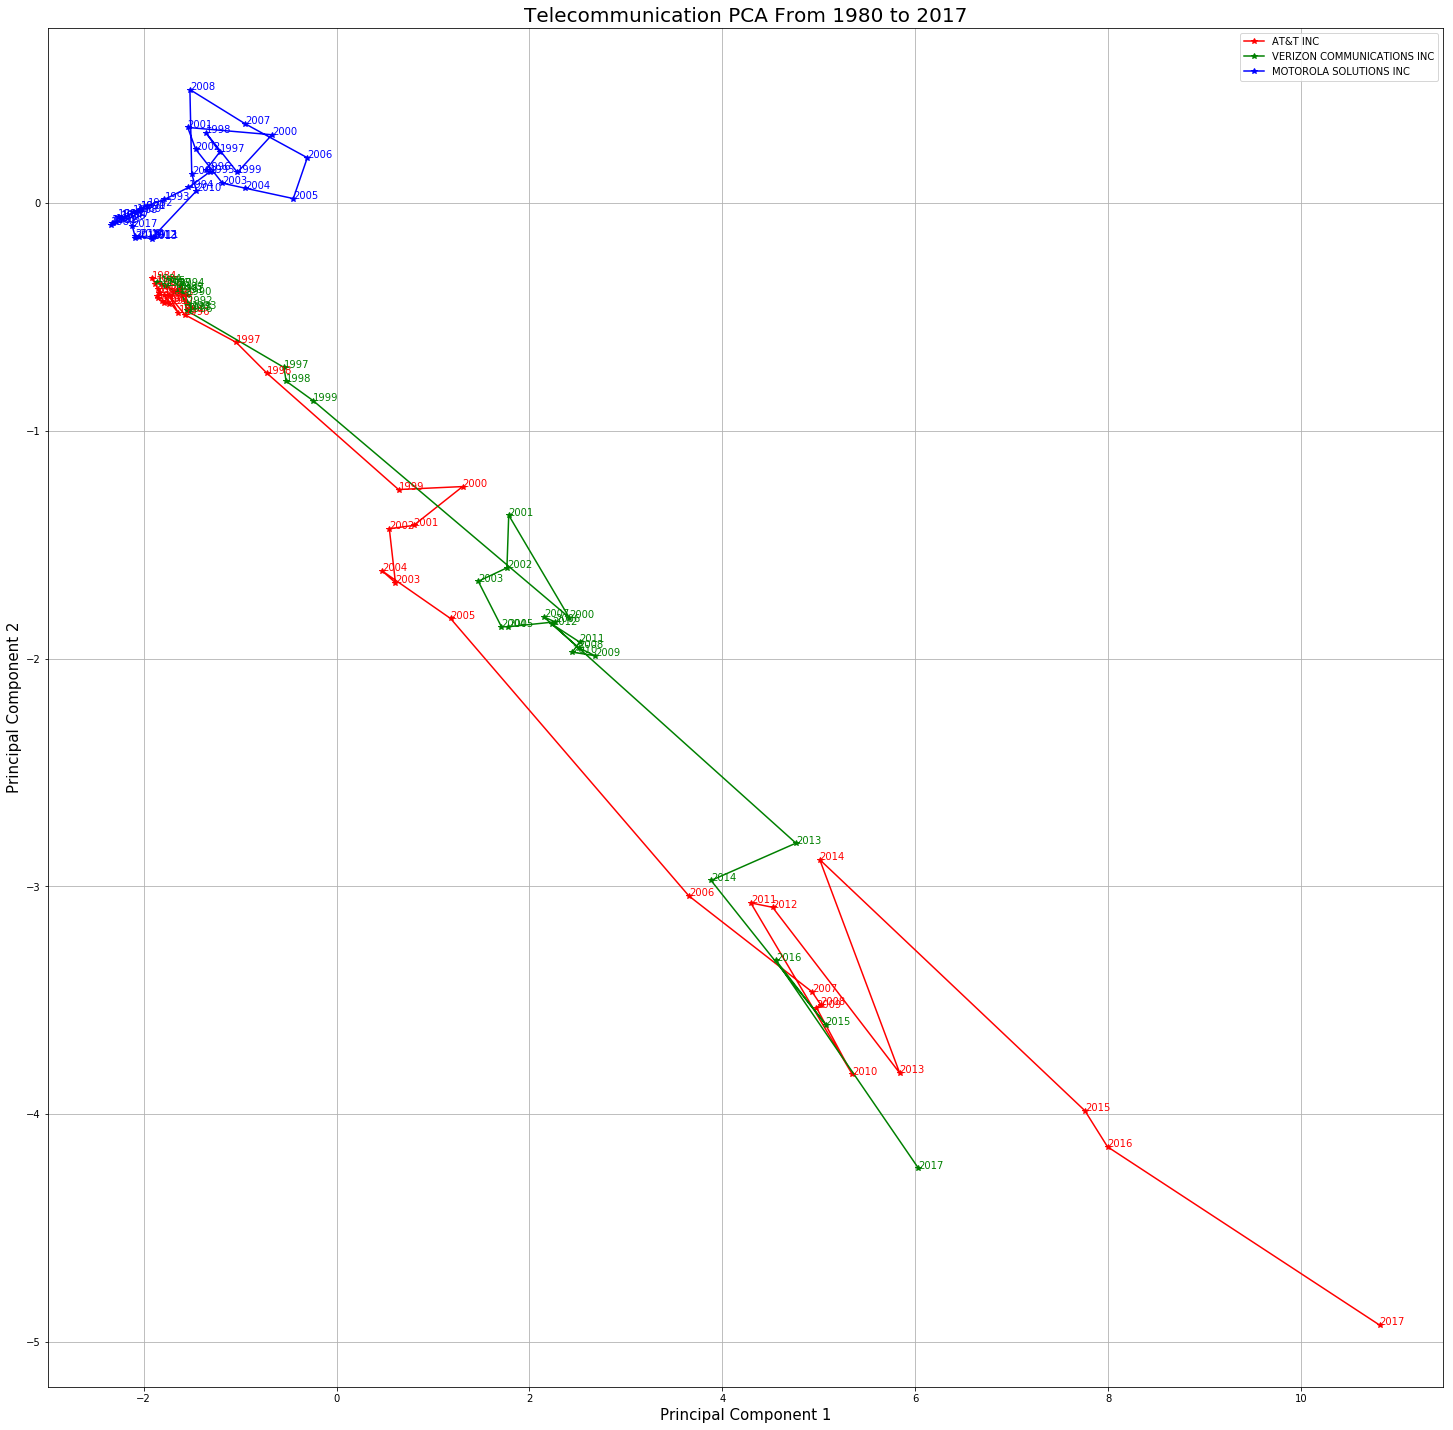

In [22]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Telecommunication PCA From 1980 to 2017', fontsize = 20)
CompanyList = Telecommunication
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

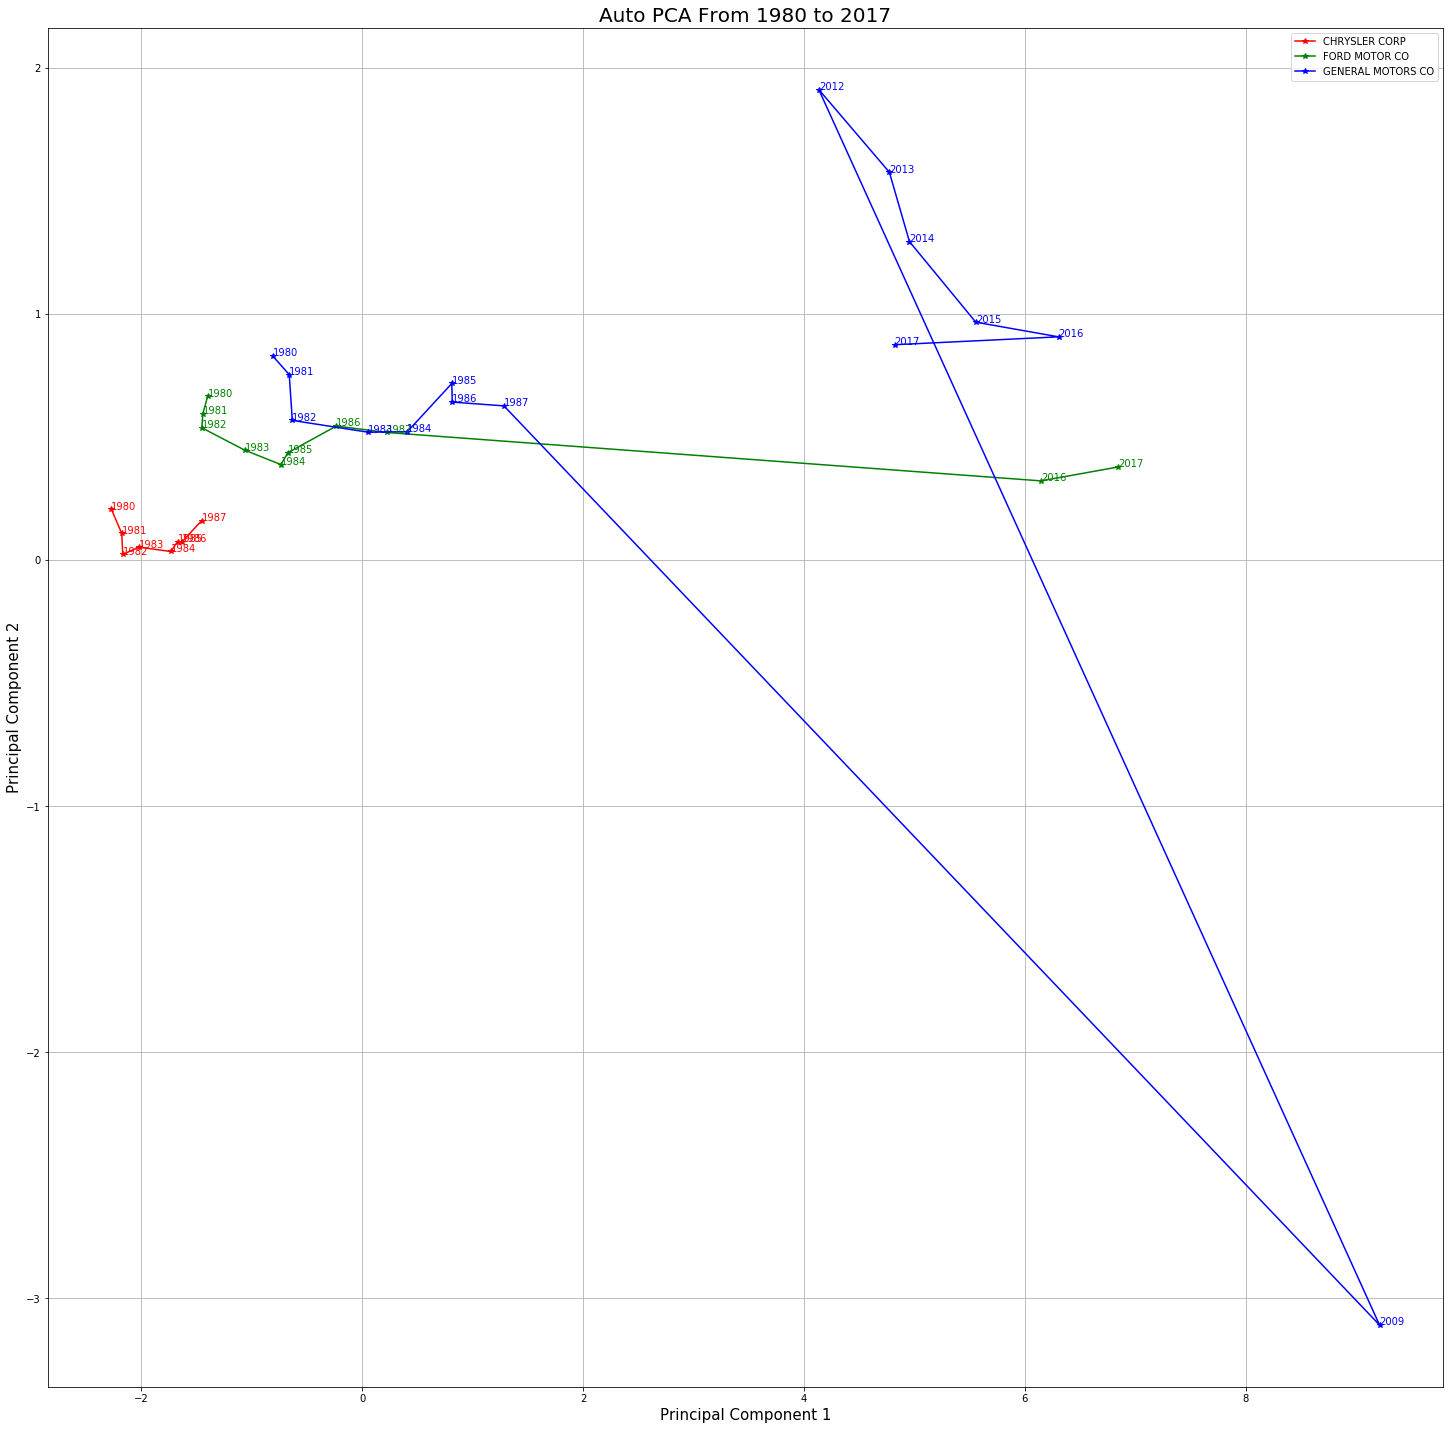

In [23]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto PCA From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Retail Plot 

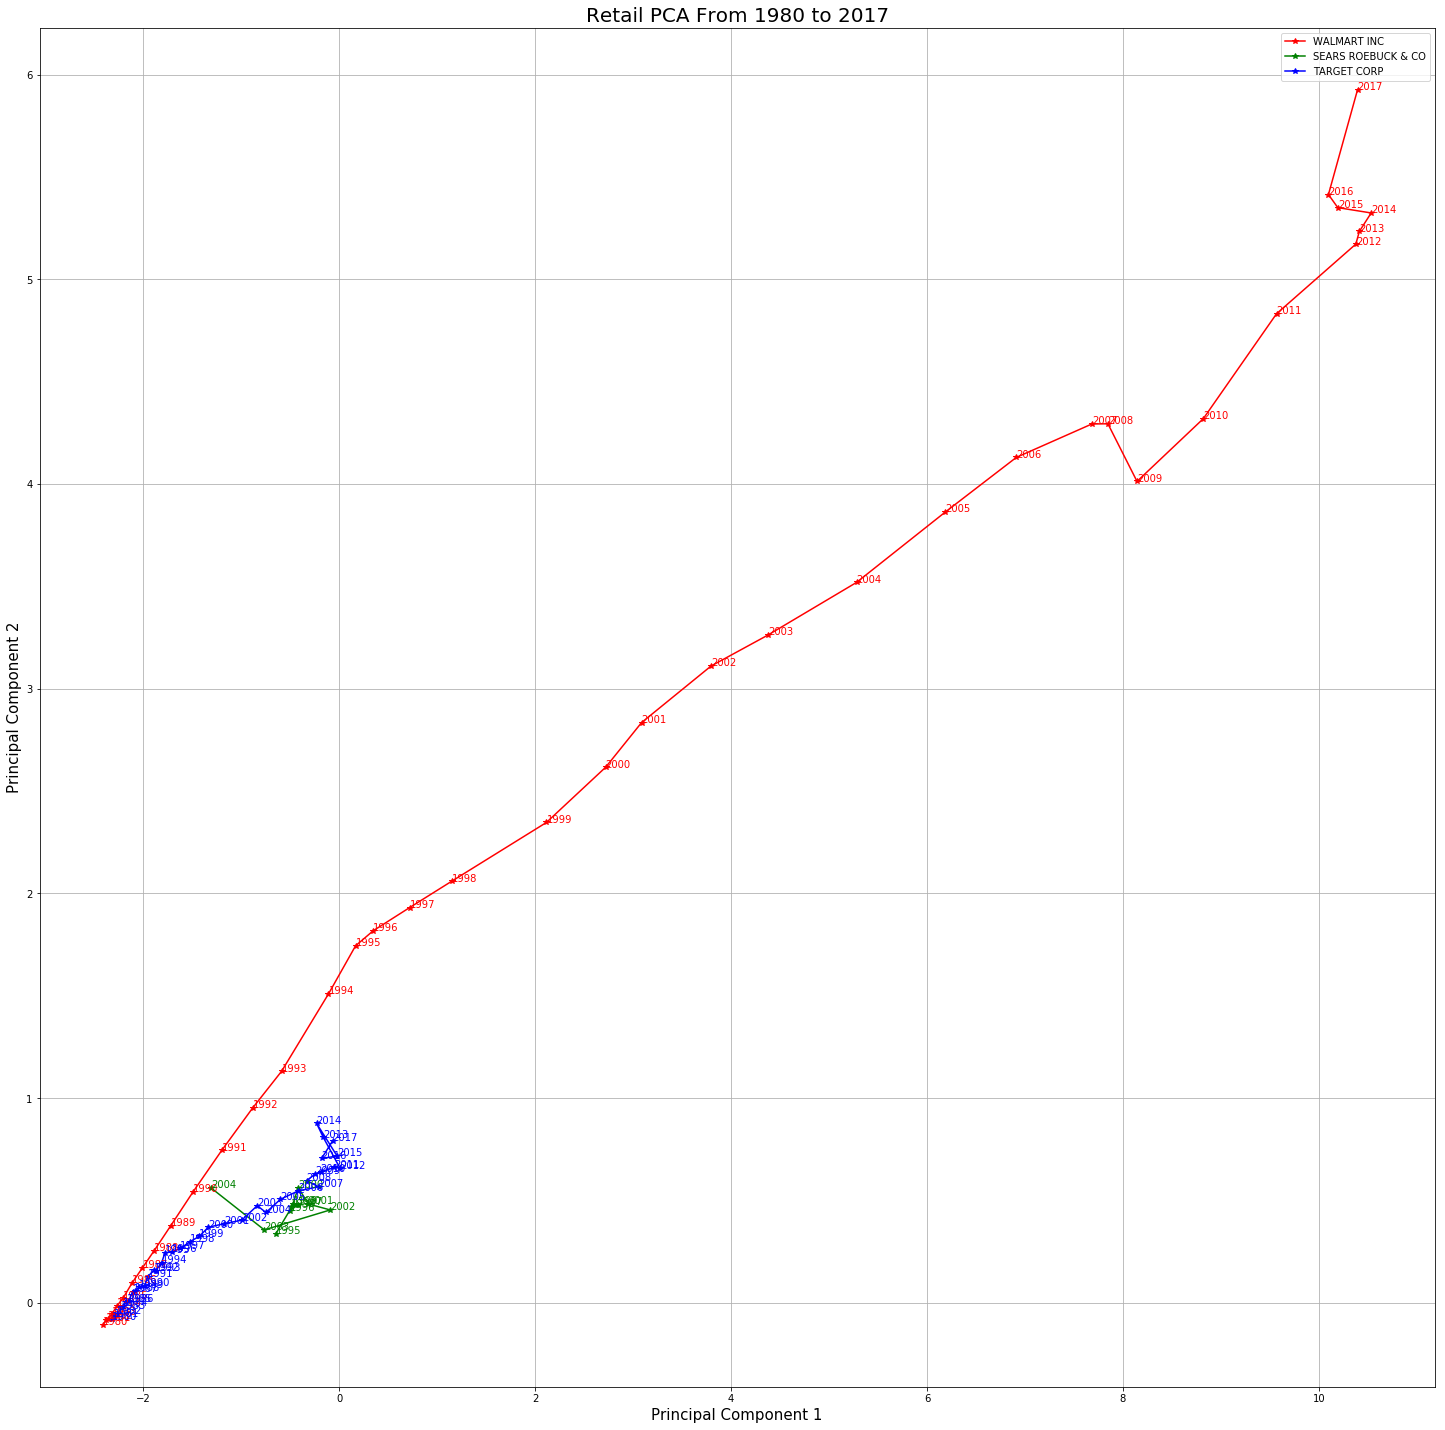

In [24]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail PCA From 1980 to 2017', fontsize = 20)
CompanyList = Retail
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Conglomerate plot

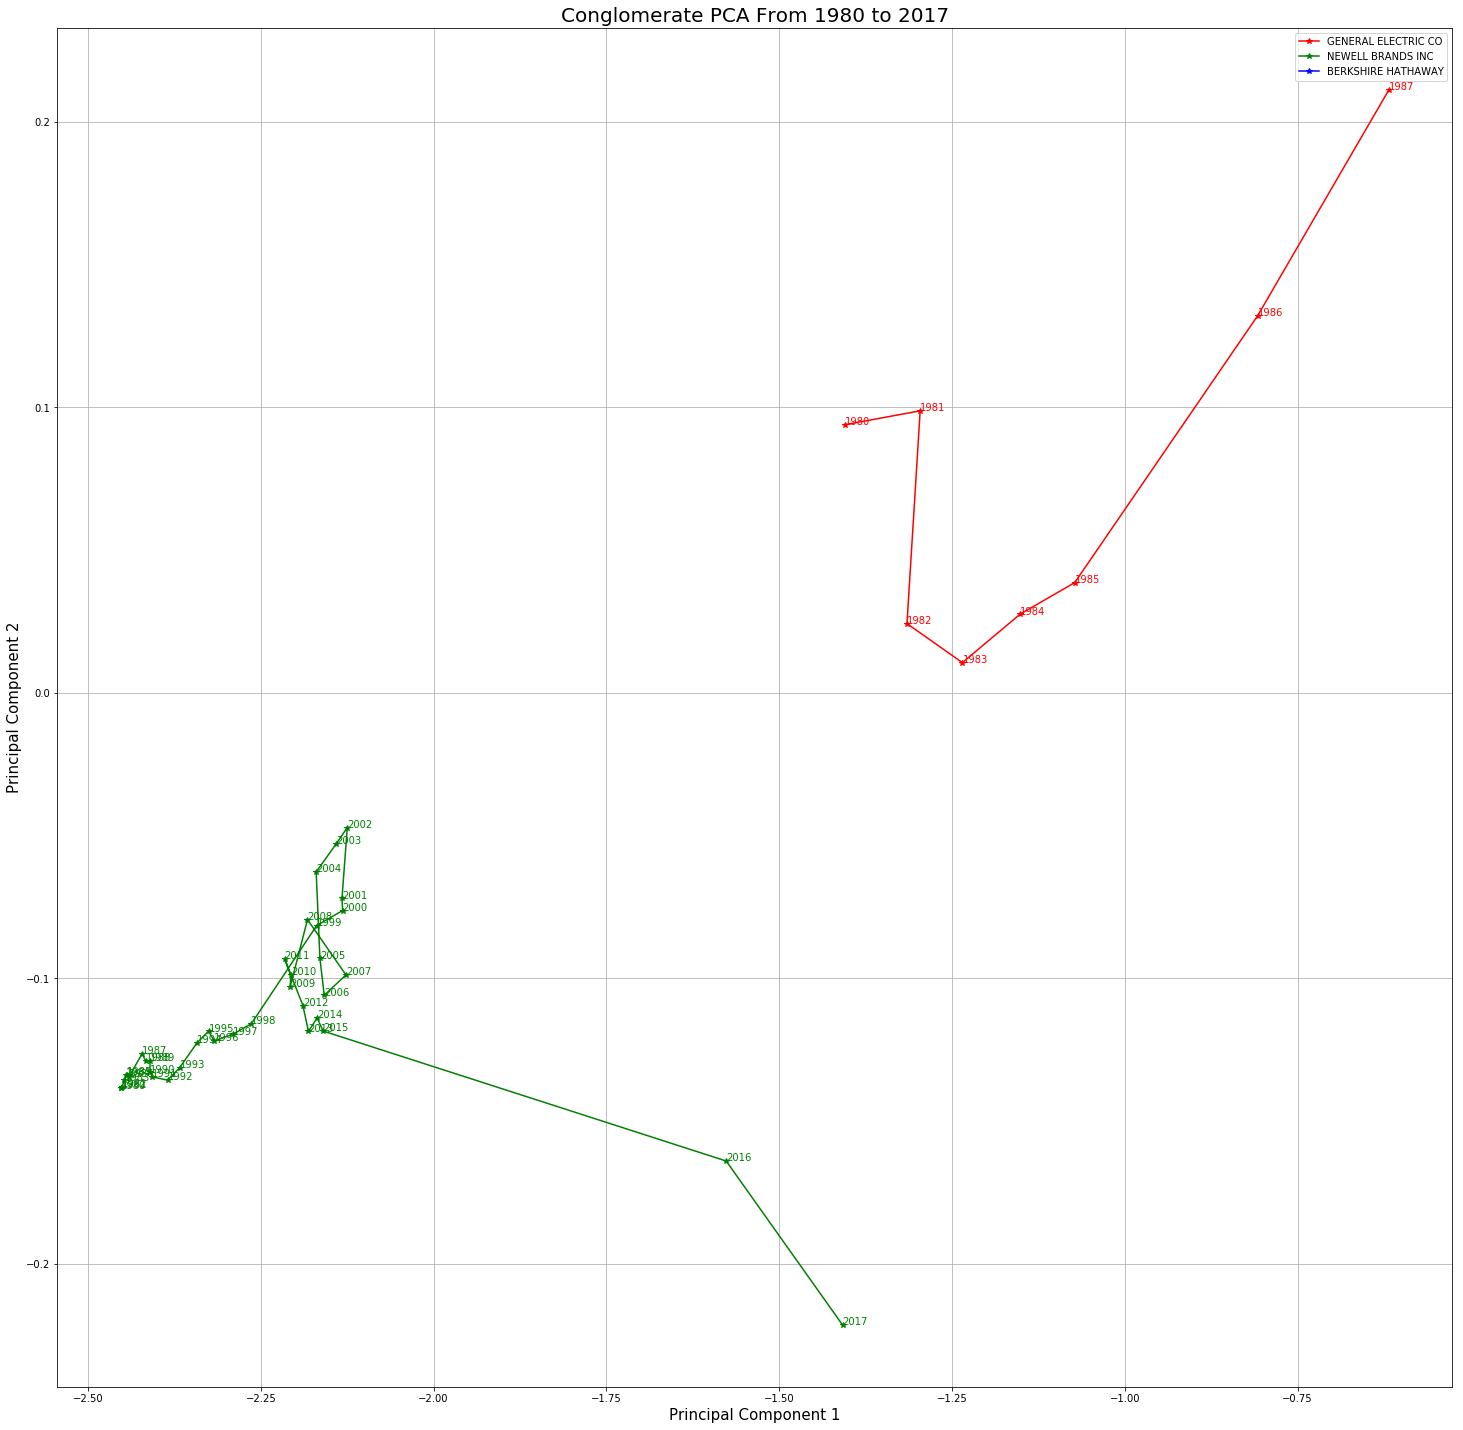

In [25]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate PCA From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

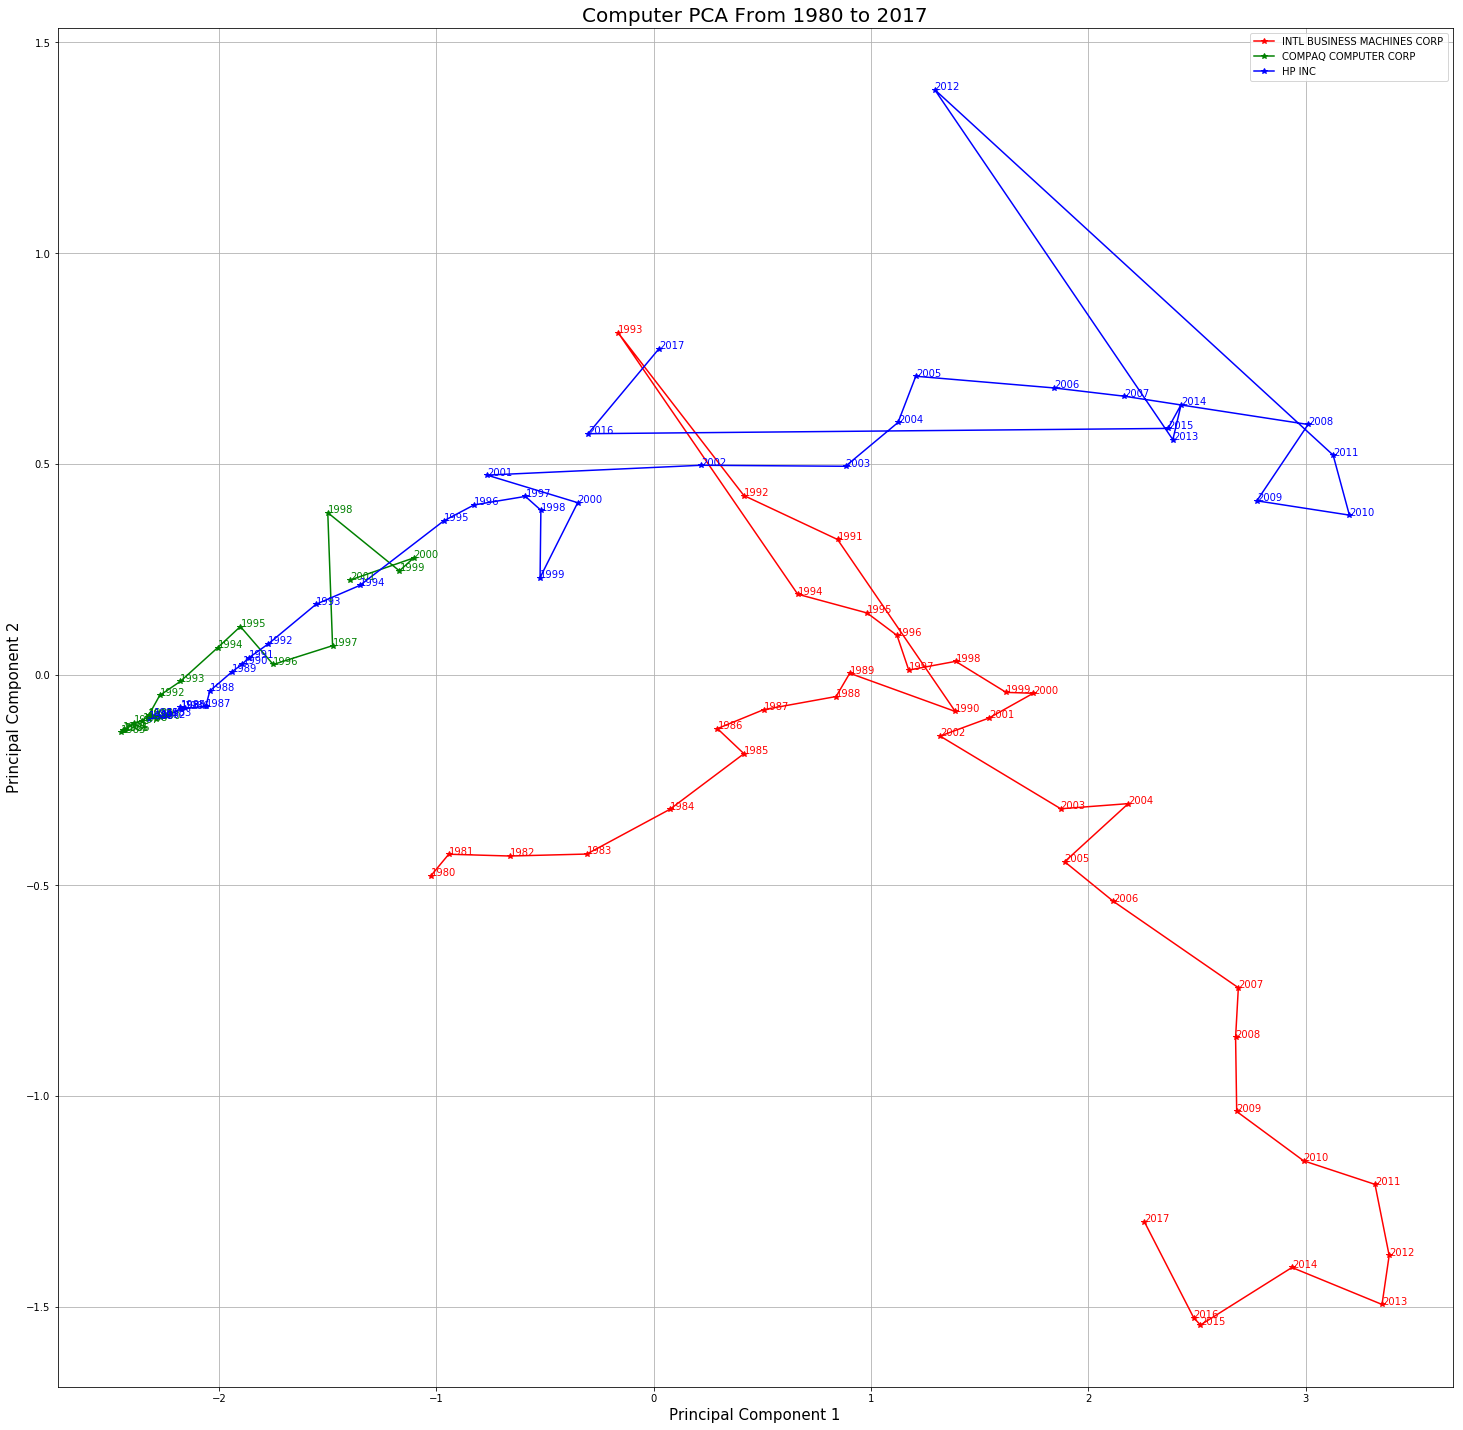

In [26]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer PCA From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## t-Distributed Stochastic Neighbouring Entities (t-SNE) Absolute values

In [27]:
# Separating out the features
x2 = DBfrom1980to2017nonans.loc[:, features].values
# Standardizing the features
x2 = StandardScaler().fit_transform(x2)



In [28]:
X_embedded = TSNE(n_components=2).fit_transform(x2)
X_embedded

array([[-12.3516035,  14.874638 ],
       [-12.526429 ,  14.444527 ],
       [-12.94548  ,  13.955494 ],
       ...,
       [ -7.6713076, -44.8395   ],
       [ -7.2865987, -44.974174 ],
       [ -7.7977495, -45.37385  ]], dtype=float32)

In [29]:
tSNEDF= pd.DataFrame (data=X_embedded, columns= ['Principal Component 1', 'Principal Component 2'])
tSNEDF.head()



Principal Component 1  Principal Component 2
0             -12.351604              14.874638
1             -12.526429              14.444527
2             -12.945480              13.955494
3             -12.674025              13.717494
4             -13.323837              13.103539

In [30]:
tsNEDF_Final= pd.concat([tSNEDF,DBfrom1980to2017nonans[['conm','fyear']] ], axis=1).sort_values('fyear')
tsNEDF_Final.head()

Principal Component 1  Principal Component 2  \
175              10.944216               0.624364   
284             -12.675147               0.649209   
574              21.691959              36.924637   
137              -6.487808             -23.095215   
34               -8.052352               1.914480   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

## oil Plot

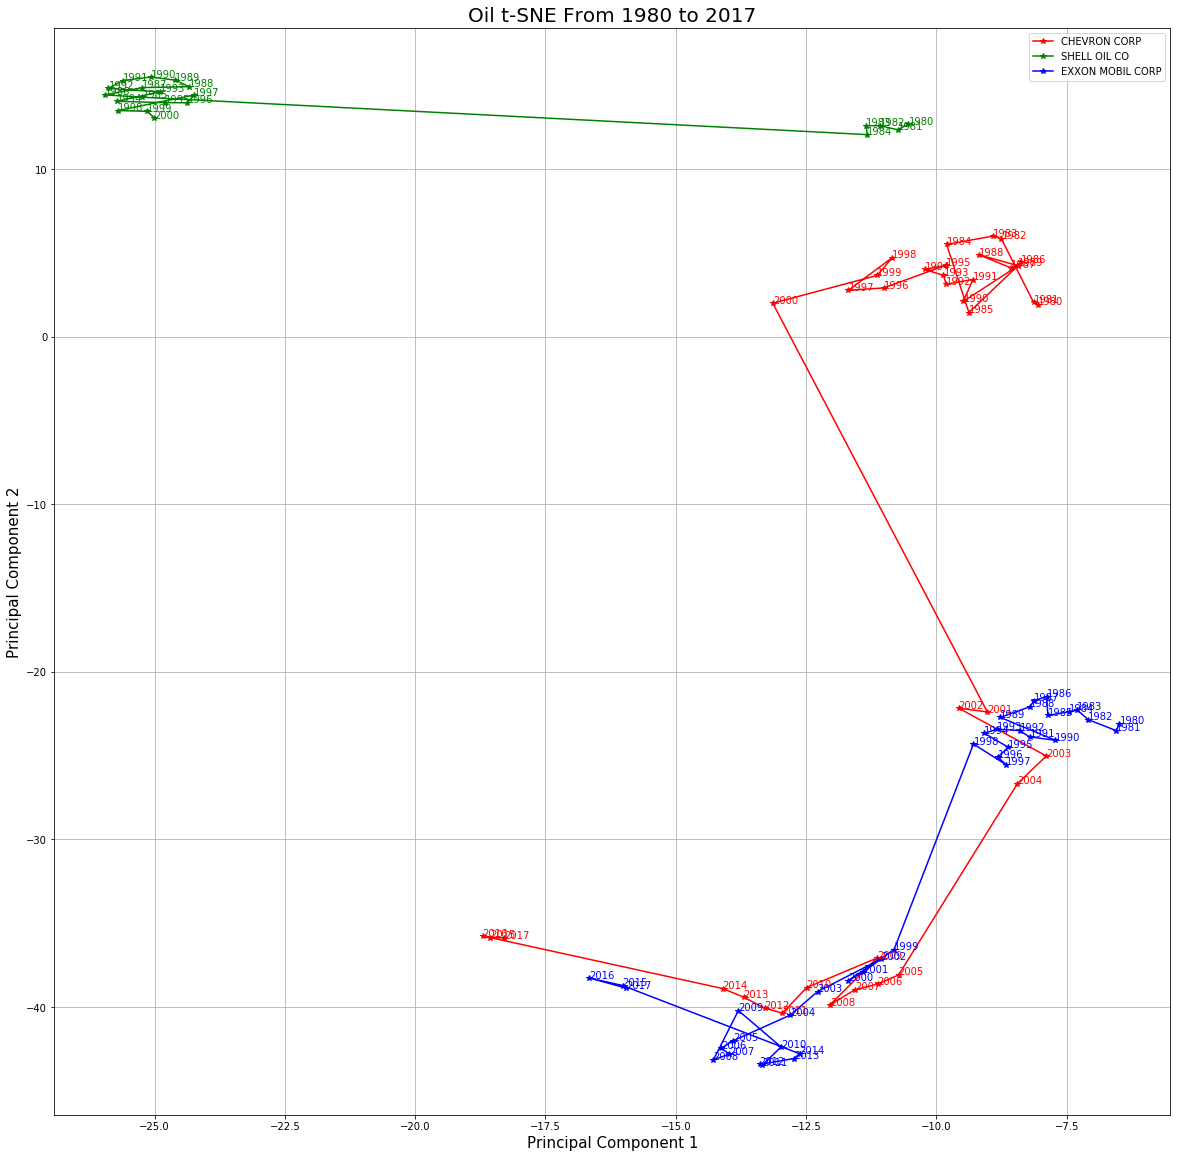

In [31]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

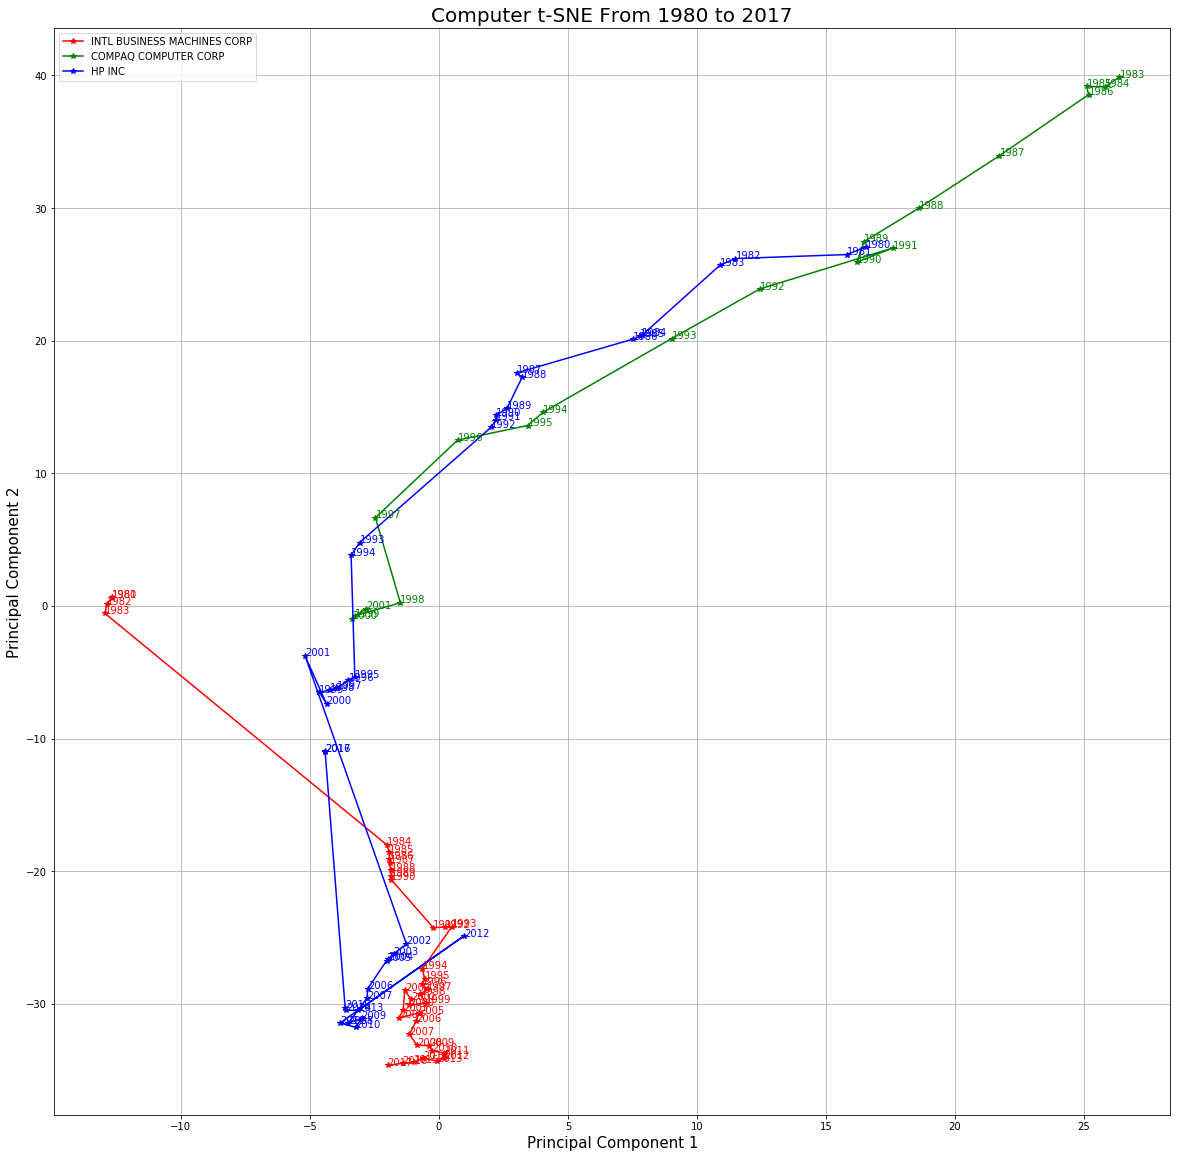

In [32]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

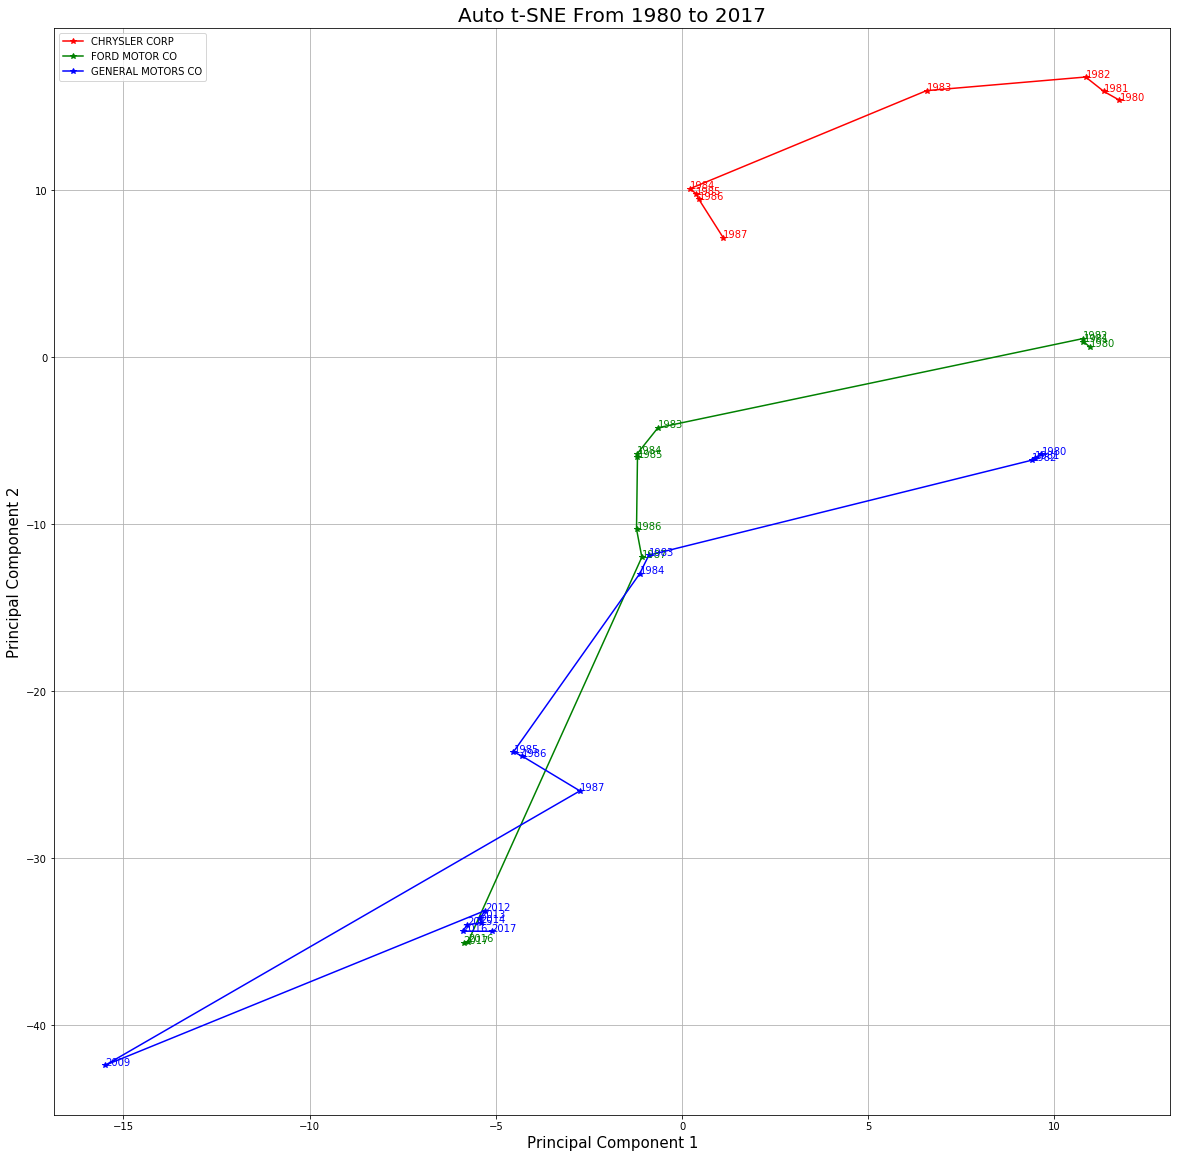

In [33]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Conglomerate

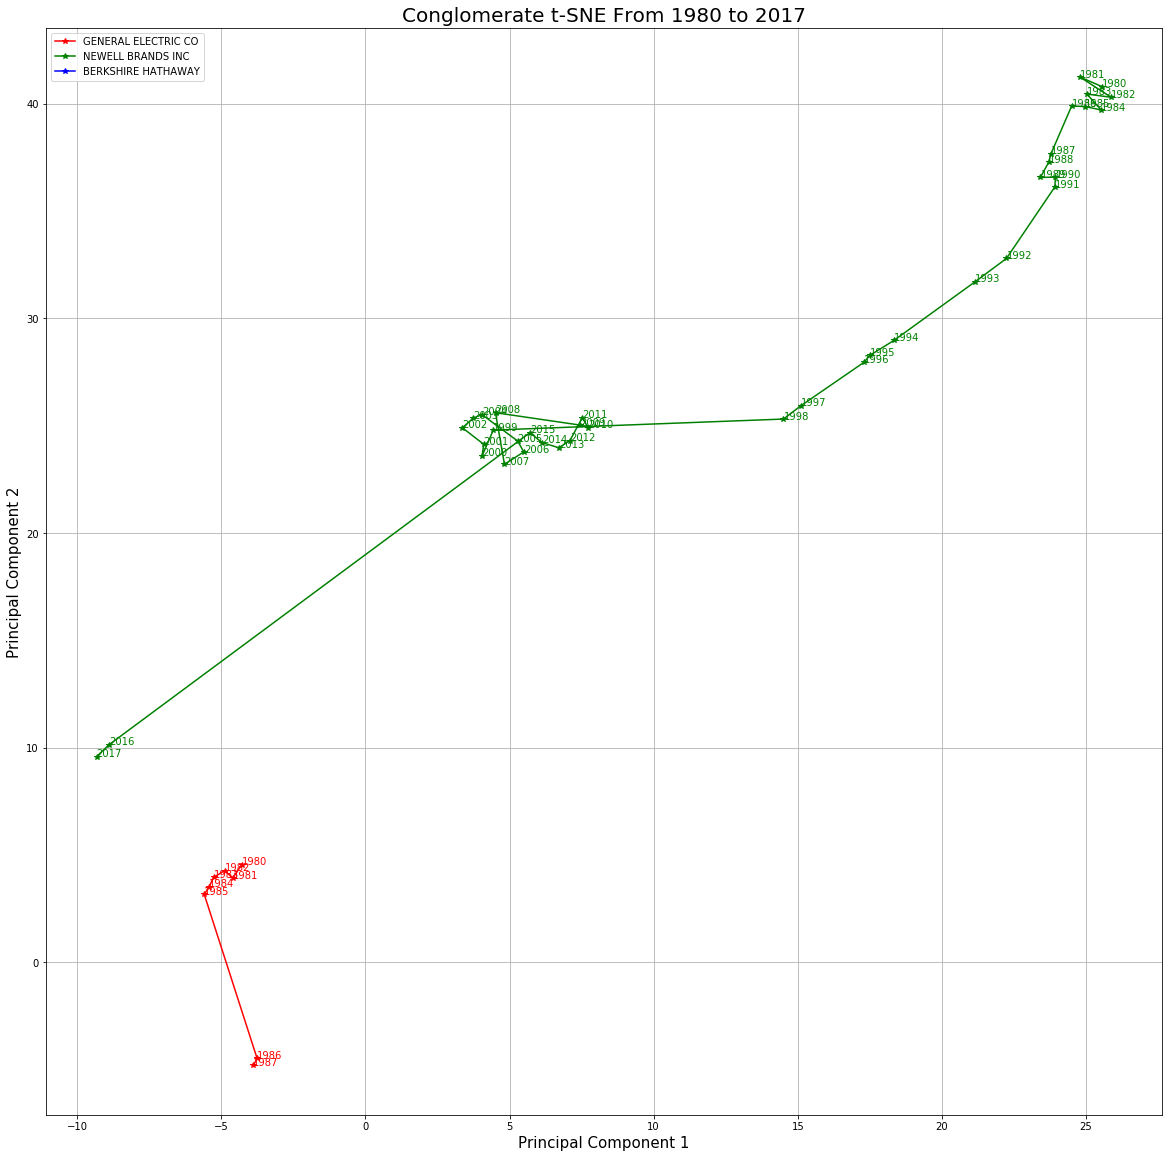

In [34]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Retail Plot

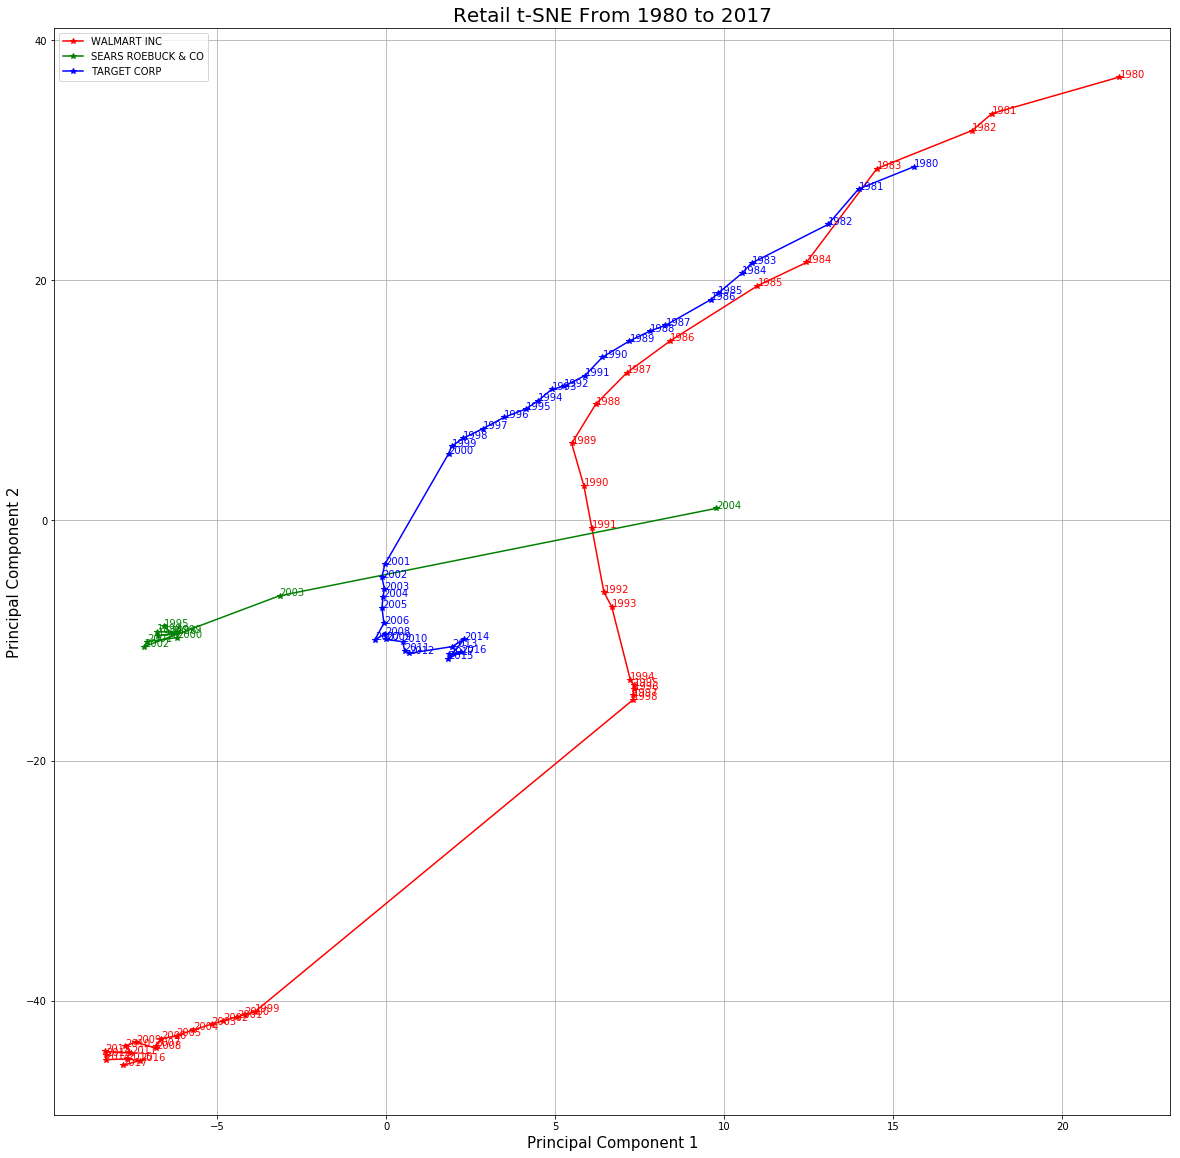

In [35]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail t-SNE From 1980 to 2017', fontsize = 20)
CompanyList = Retail
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

1. AT -- Assets 
2. Total BKVLPS 
3. Book Value Per Share
4. COGS -- Cost of Goods Sold 
5. DVT -- Dividends - Total
6. IB -- Income Before Extraordinary Items 
7. LT -- Liabilities - Total
8. NI -- Net Income (Loss) 
9. REVT -- Revenue - Total SALE -- Sales/Turnover (Net)
10. SEQ -- Stockholders' Equity - Total
11. ACT -- Current Assets
12. Ap -- Account Payable
13. ARTFS --- Account receivable*
14. invt -- Inventory
15. lct -- Current Liabilities

## Ratios: Combination of different ratios

In [36]:
DB_Ratio=DBfrom1980to2017nonans
DB_Ratio 
DB_Ratio['CR']=DB_Ratio['act']/DB_Ratio['lct']   #Current ratio
DB_Ratio['QR']=(DB_Ratio['act'] - DB_Ratio['invt']) /DB_Ratio['lct'] #Quick ratio
DB_Ratio['DT']=DB_Ratio['lt']/DB_Ratio['at']   #Debt ratio
DB_Ratio['DE']=DB_Ratio['lt']/DB_Ratio['seq']  #Debt to Equity
DB_Ratio['GM']=(DB_Ratio['revt'] - DB_Ratio['cogs'])/DB_Ratio['revt']   #Gross Margin
DB_Ratio['NPM']=DB_Ratio['ni']/DB_Ratio['revt']  #Net Profit Margin
DB_Ratio['RA']=DB_Ratio['ni']/DB_Ratio['at']  #return on Asset
DB_Ratio['RE']=DB_Ratio['ni']/DB_Ratio['seq'] # Return on Equity

DB_Ratio.head()

gvkey   fyear                        conm       act      ap   invt  \
0  002136  1984.0  VERIZON COMMUNICATIONS INC  2600.400  1290.7  121.8   
1  002136  1985.0  VERIZON COMMUNICATIONS INC  2683.699  1227.1  242.3   
2  002136  1986.0  VERIZON COMMUNICATIONS INC  2755.600  1292.2  270.9   
3  002136  1987.0  VERIZON COMMUNICATIONS INC  2796.600  1523.6  298.6   
4  002136  1988.0  VERIZON COMMUNICATIONS INC  3206.400  1622.3  316.5   

        lct      ebit         at   bkvlps    ...          revt       seq  \
0  2741.200  2114.780  18684.203  75.3744    ...      8090.051  7508.499   
1  2831.899  2331.899  19788.305  79.3134    ...      9084.145  7921.270   
2  3593.800  2470.901  21090.805  41.8186    ...      9920.797  8320.697   
3  3183.800  2357.000  21245.100  44.1303    ...     10298.400  8741.900   
4  4265.200  2406.600  24729.200  46.5787    ...     10880.100  9176.700   

         CR        QR        DT        DE        GM       NPM        RA  \
0  0.948636  0.904203  0.598142  1.488420  0.408981  0.120284  0.052081   
1  0.947668  0.862107  0.599702  1.498130  0.417838  0.120309  0.055230   
2  0.766765  0.691385  0.605486  1.534751  0.437898  0.117642  0.055337   
3  0.878384  0.784597  0.588522  1.430261  0.430902  0.120446  0.058385   
4  0.751758  0.677553  0.628912  1.694781  0.437551  0.121028  0.053249   

         RE  
0  0.129600  
1  0.137970  
2  0.140265  
3  0.141891  
4  0.143494  

[5 rows x 25 columns]

## 1. PCA

In [37]:
features1 = ['CR', 'QR', 'DT', 'DE','GM','NPM','RA','RE']
# Separating out the features
x3 = DB_Ratio.loc[:, features1].values
# Standardizing the features
x3 = StandardScaler().fit_transform(x3)


In [38]:
pca = PCA(n_components=2)
principalcomp1= pca.fit_transform(x3)
principalDF1= pd.DataFrame (data=principalcomp1, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF1.head()



Principal Component 1  Principal Component 2
0               0.664845              -0.412266
1               0.691600              -0.478000
2               0.588707              -0.867057
3               0.717639              -0.620593
4               0.563826              -0.959359

In [39]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.25710791 0.20697212]


In [40]:
FinalDF1= pd.concat([principalDF1,DB_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF1.head()



Principal Component 1  Principal Component 2  \
175              -3.208434              -0.255445   
284               2.770308               0.844557   
574              -0.228065              -0.146125   
137               0.231587               0.180597   
34                0.441485               0.635690   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

## Oil Plot

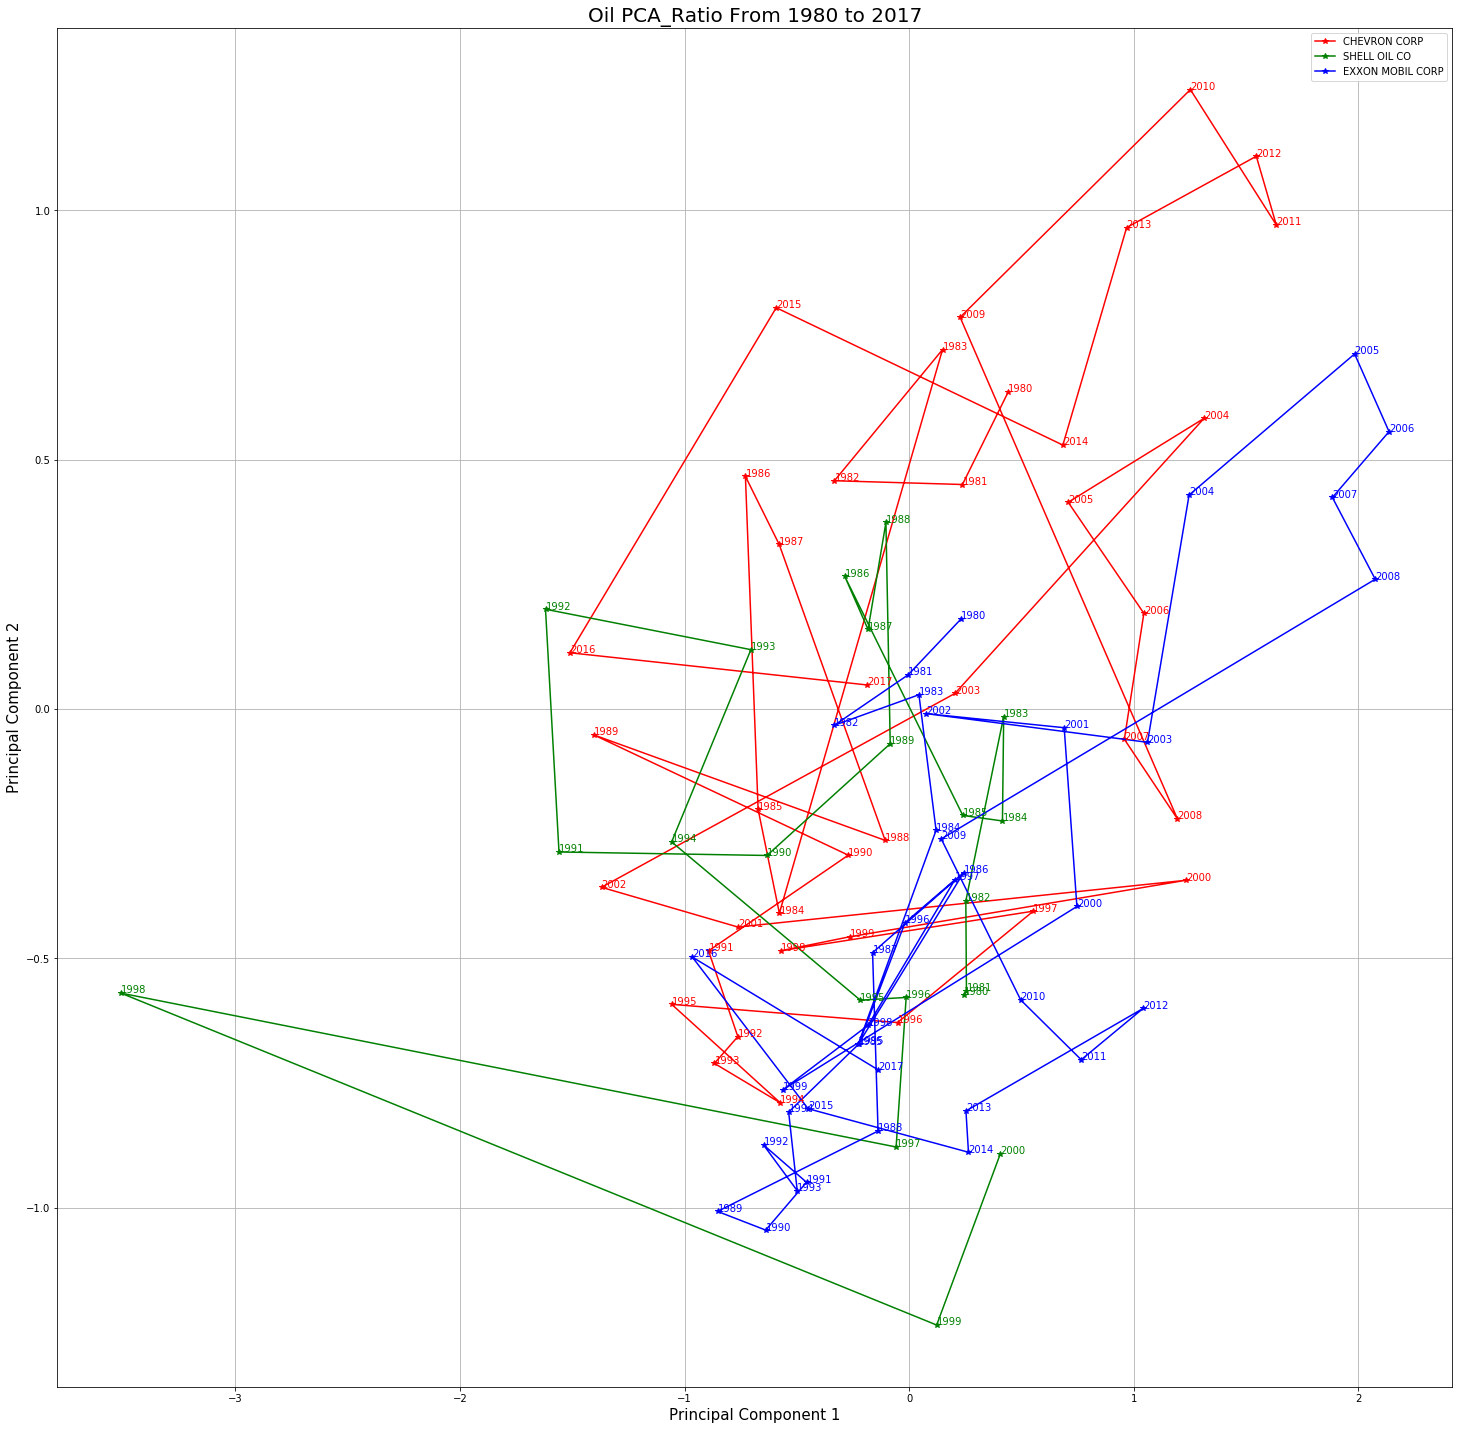

In [41]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

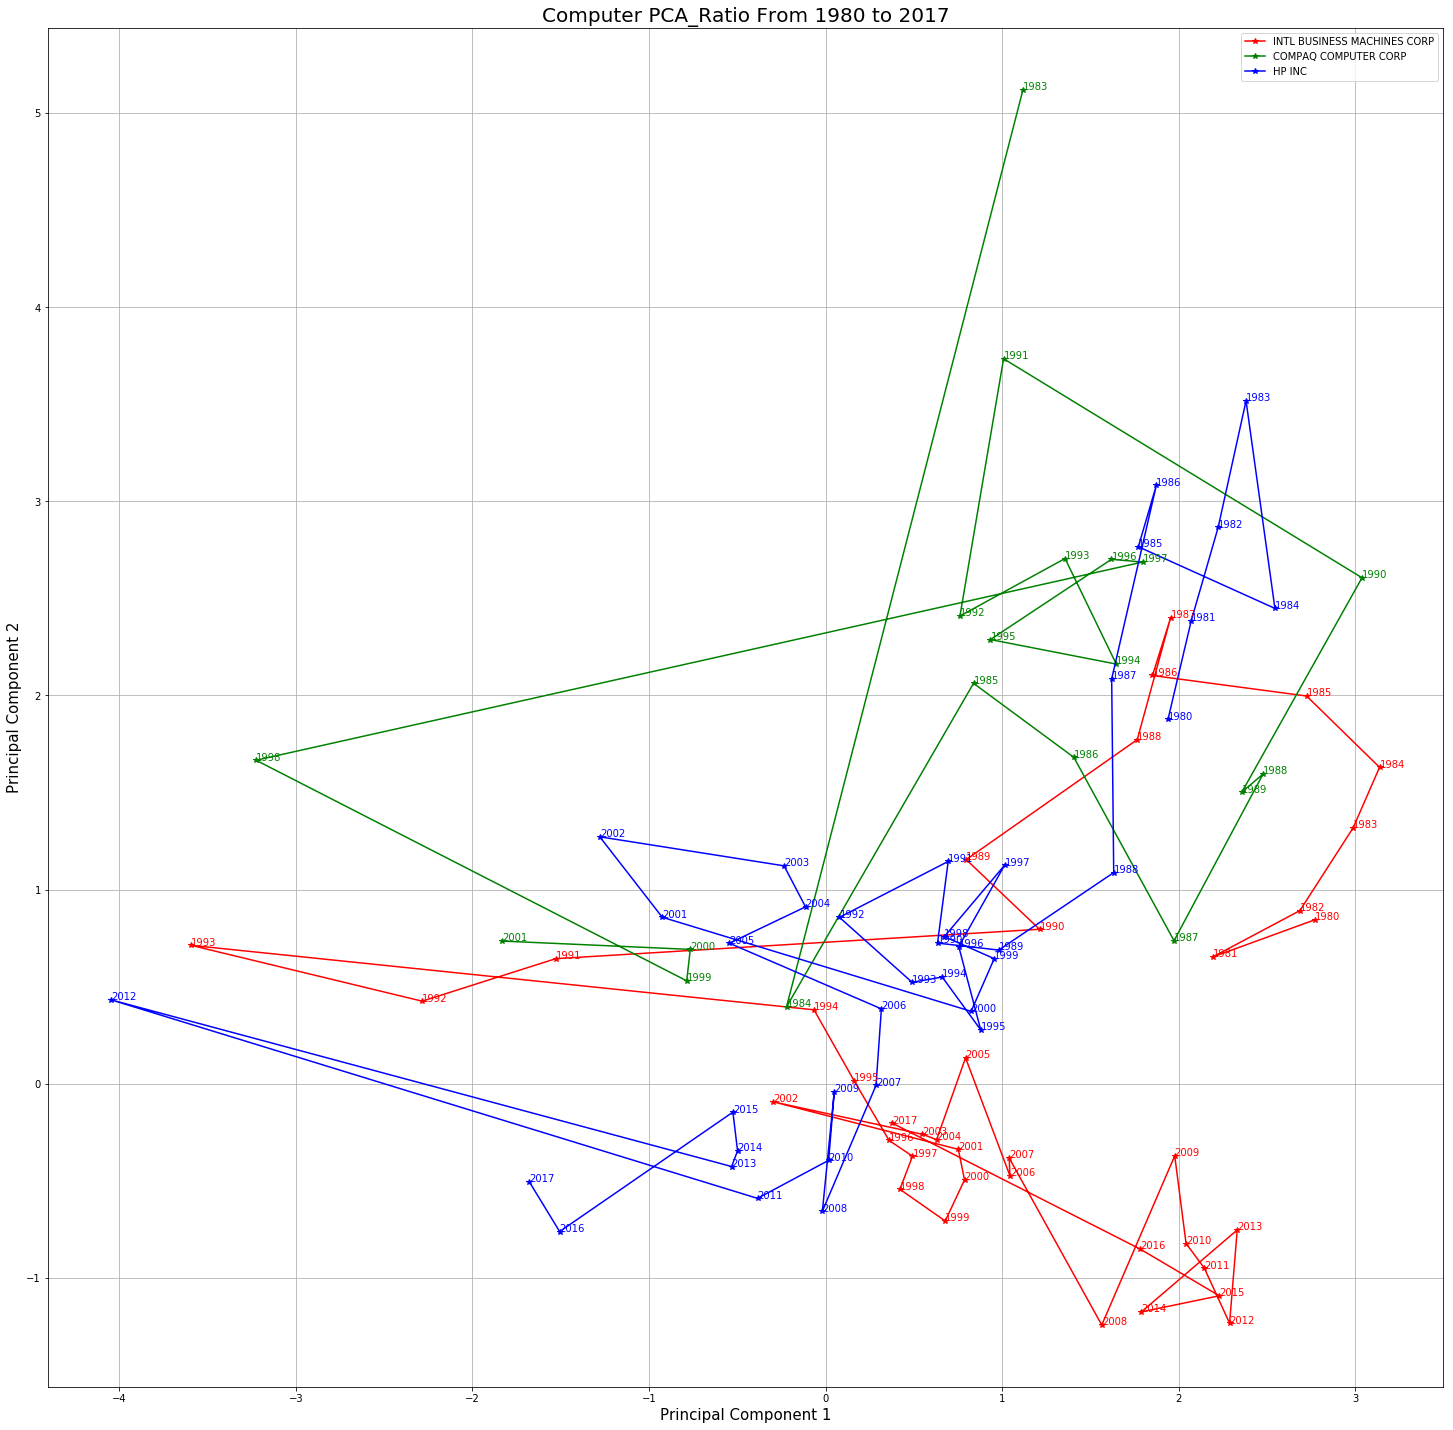

In [42]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

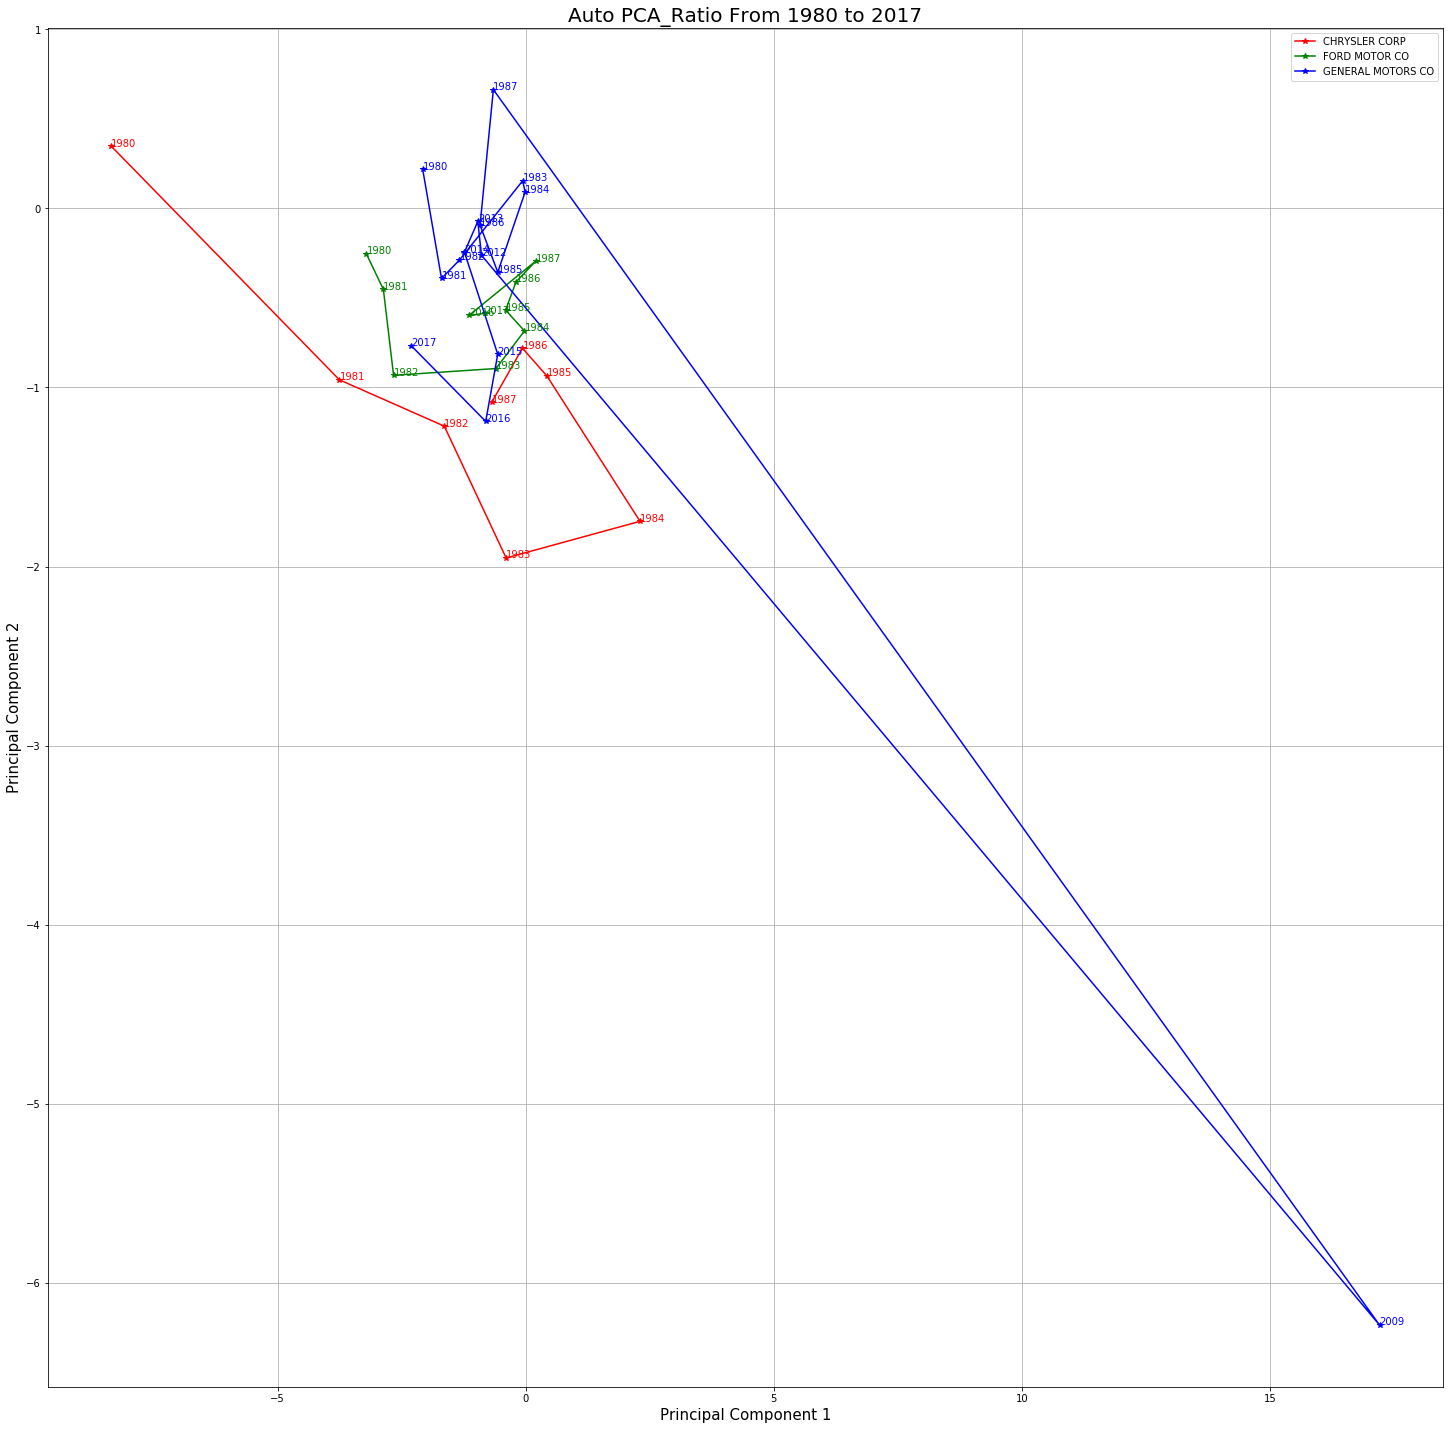

In [43]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Conglomerate Plot

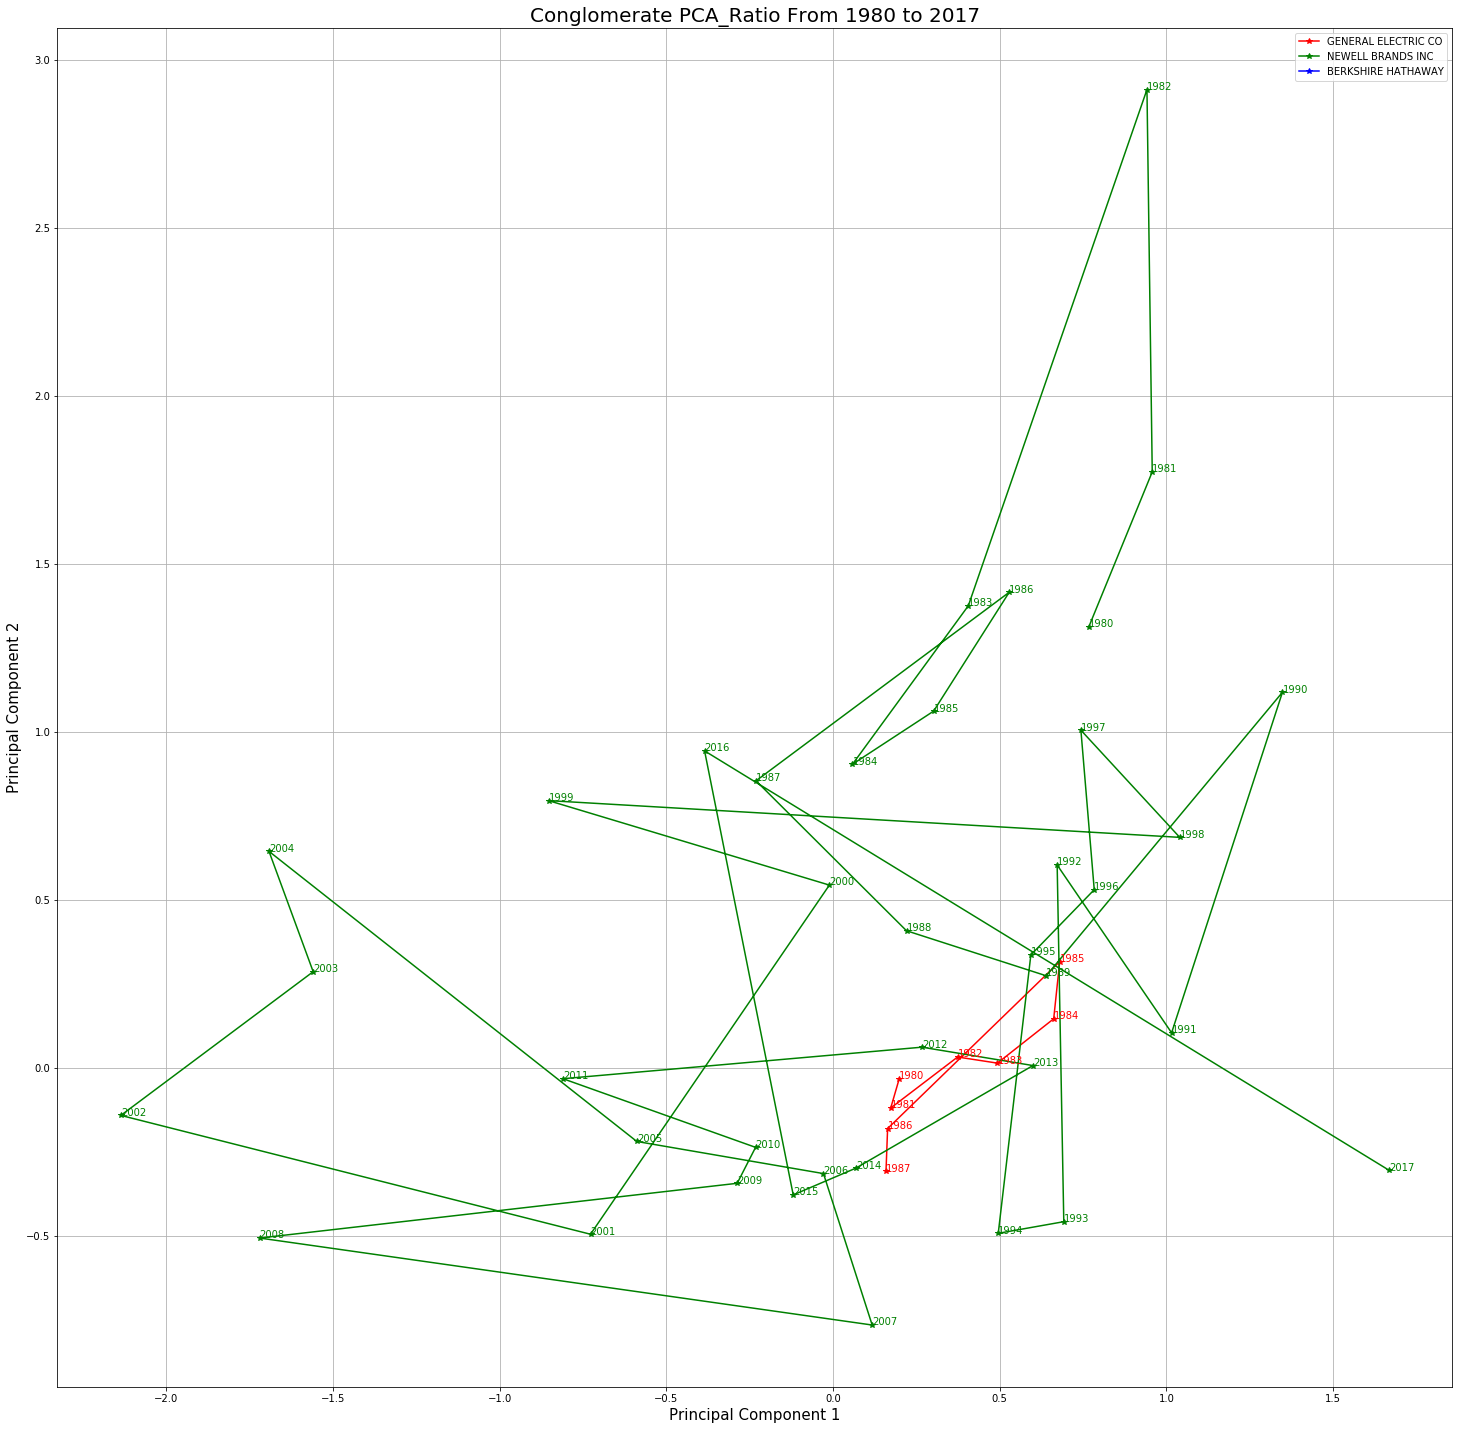

In [44]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Retail Plot

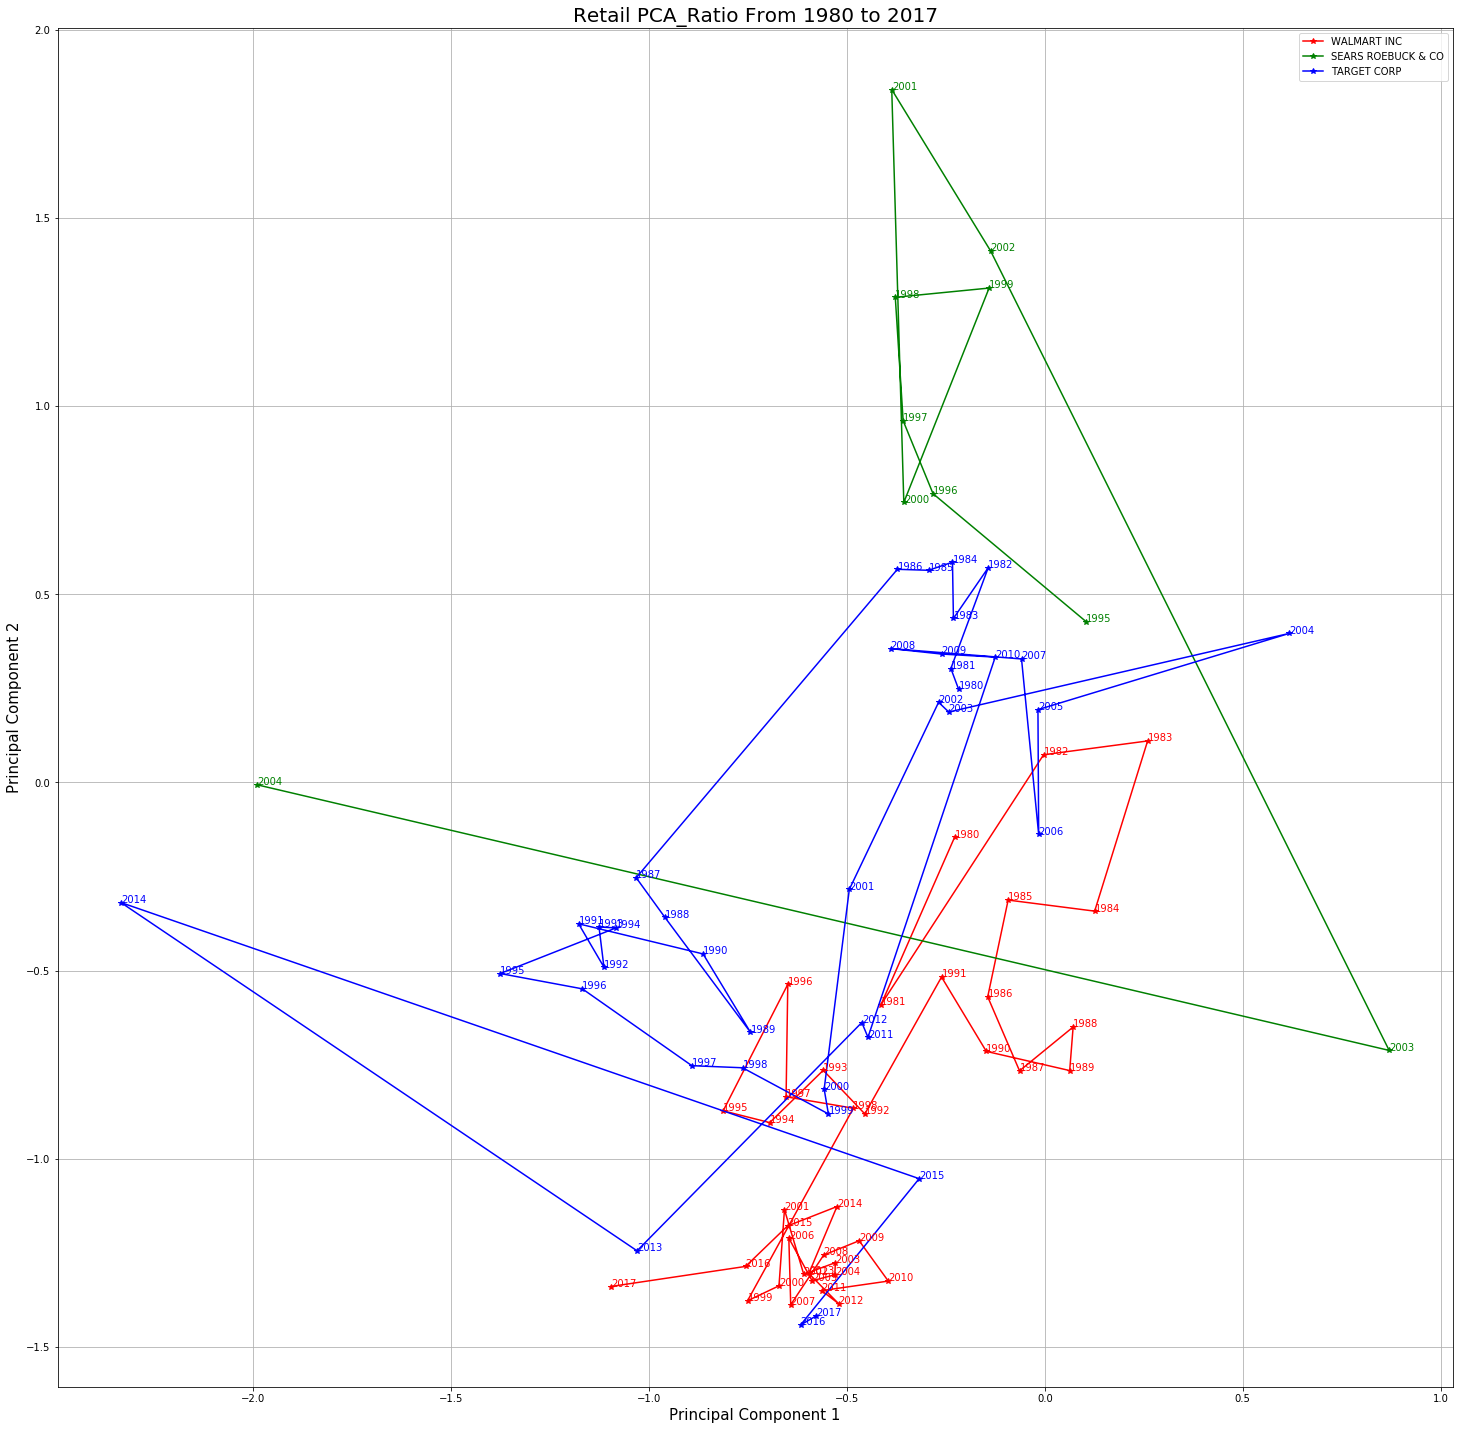

In [45]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Retail
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware

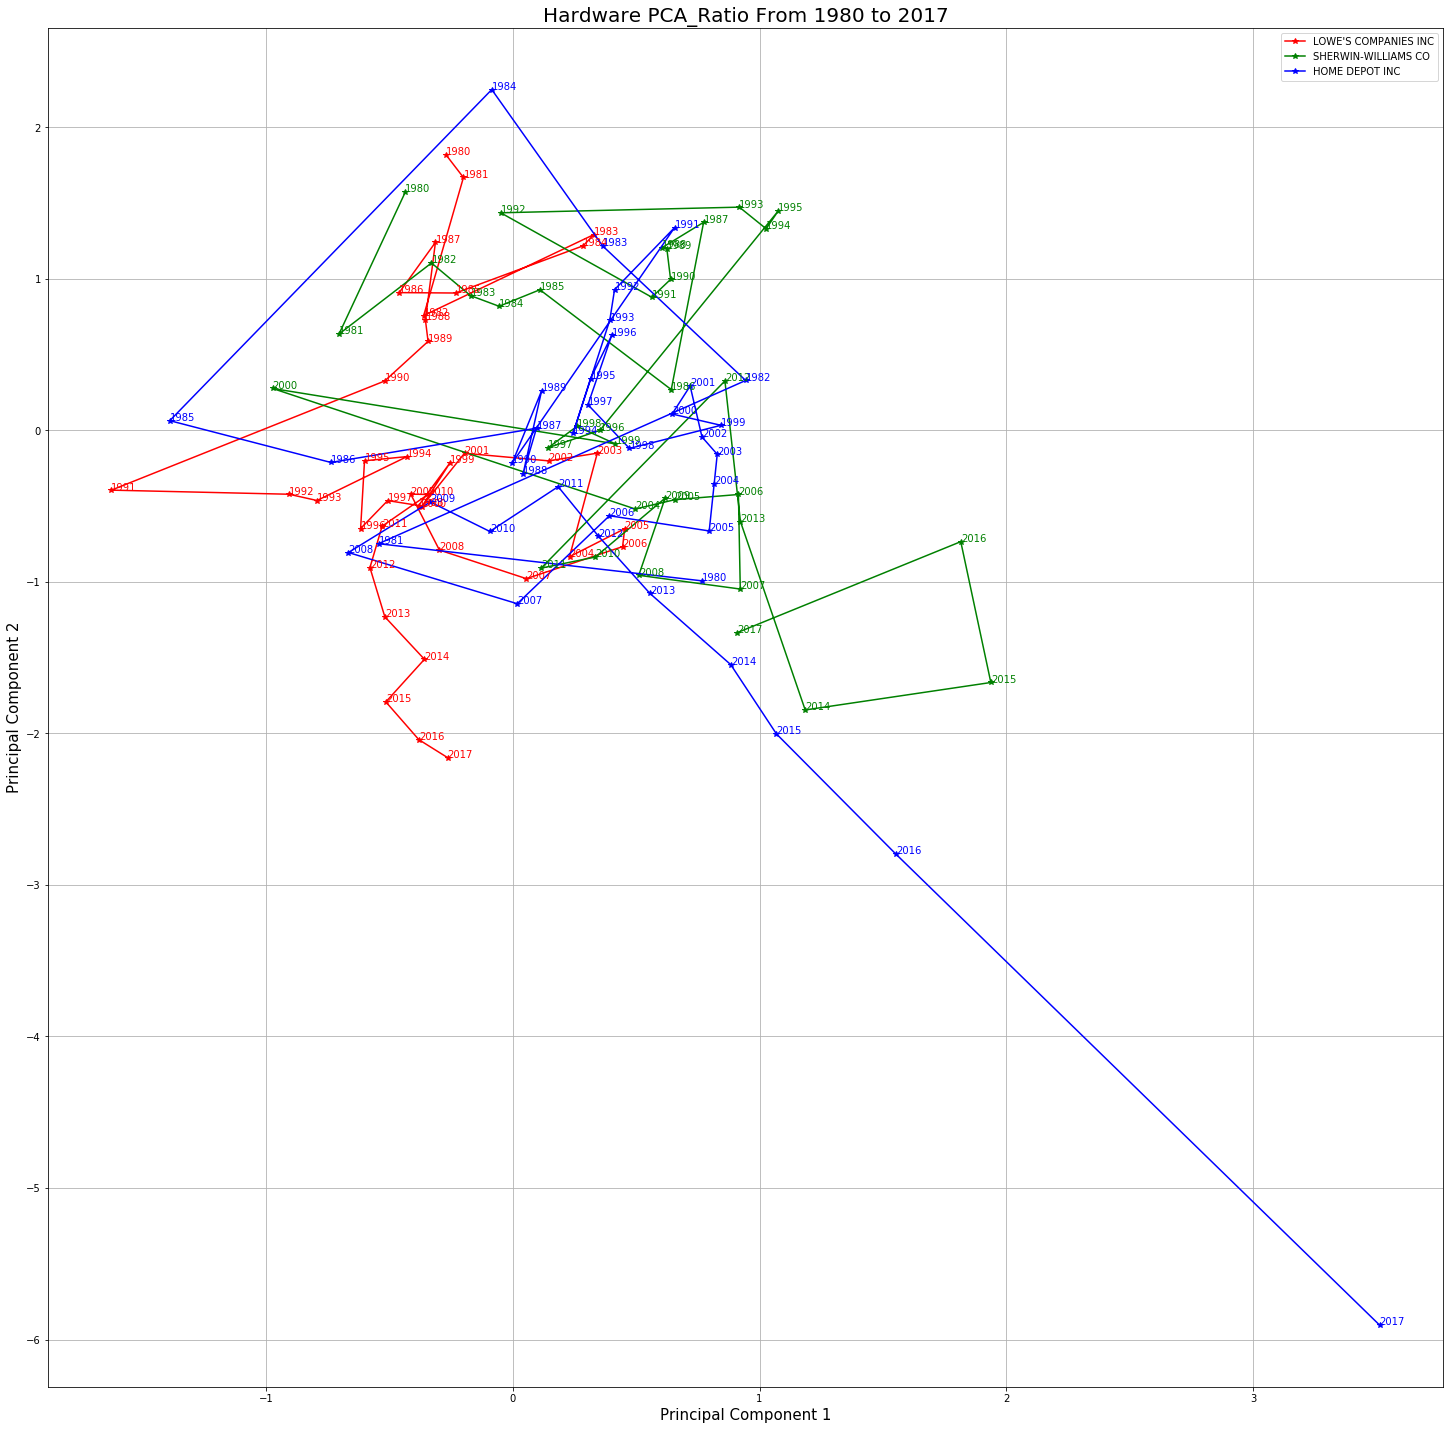

In [46]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Telecommunication

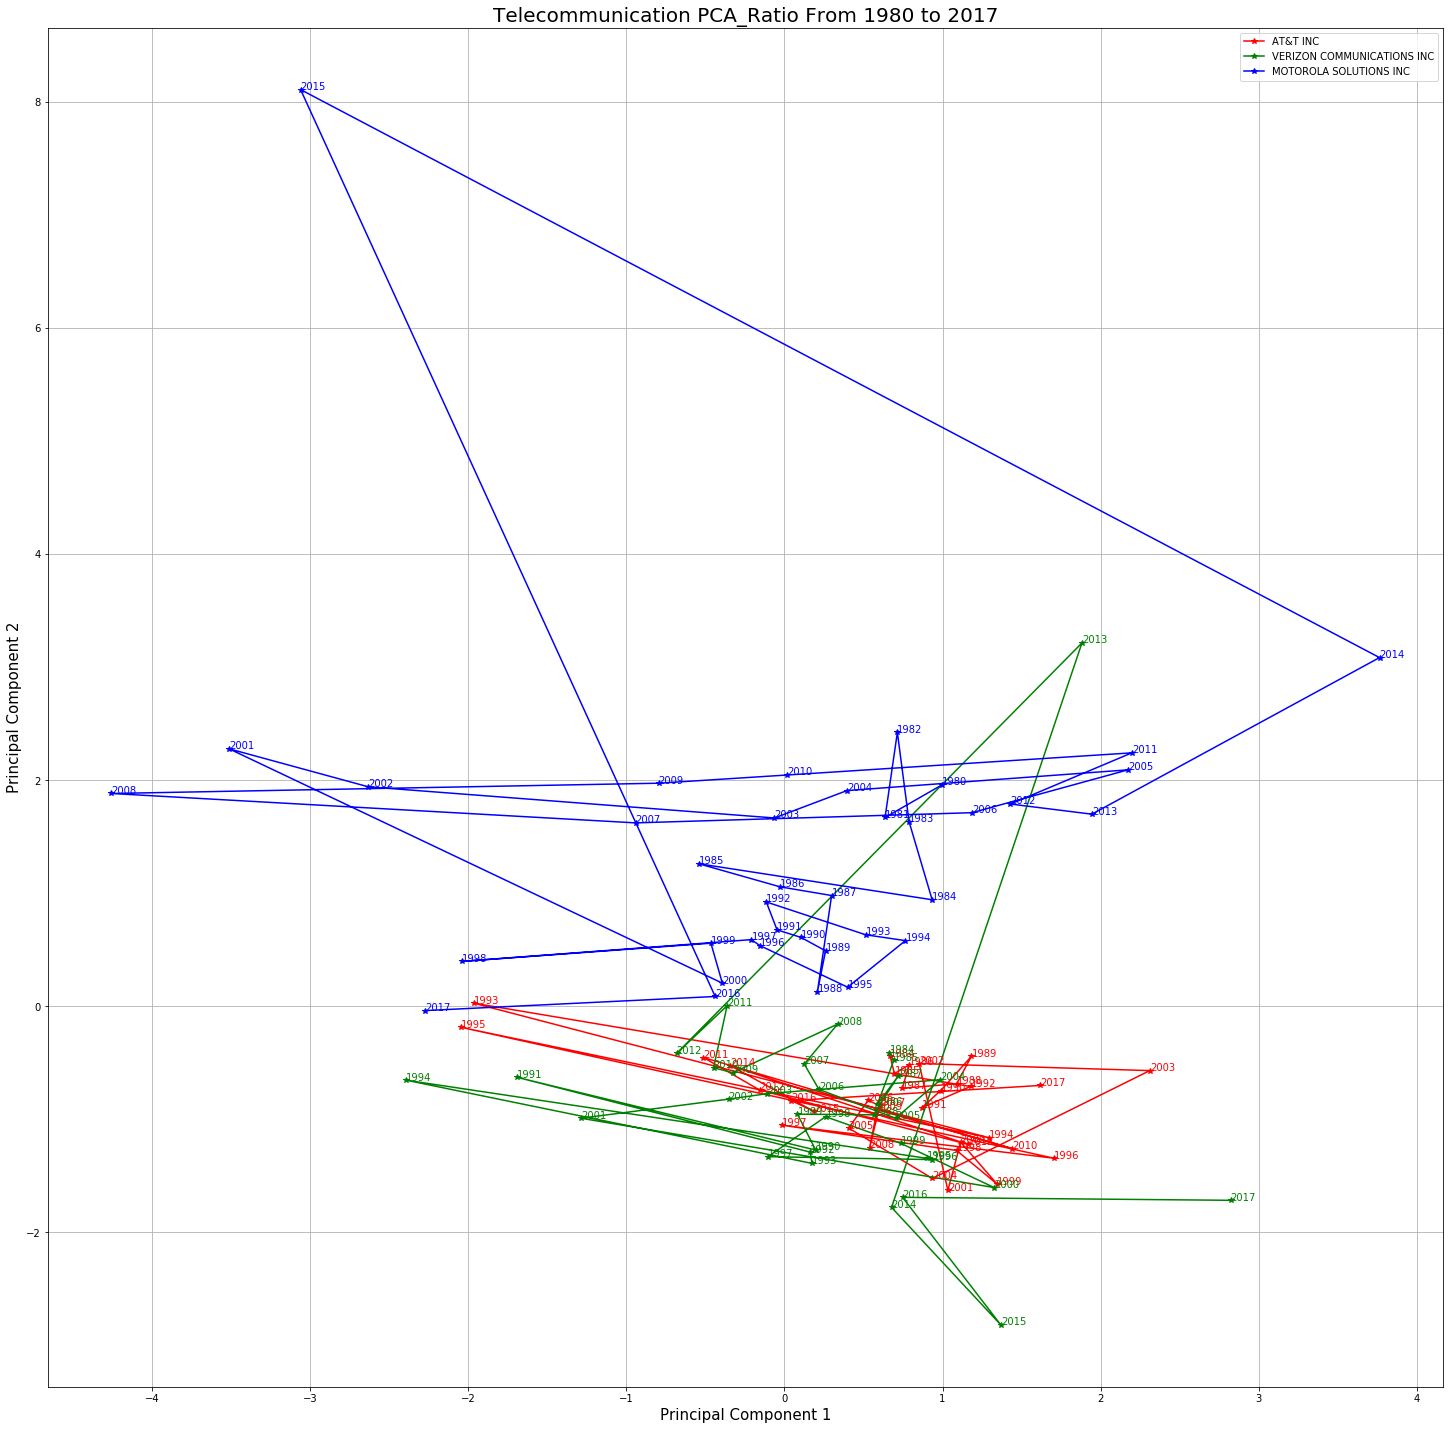

In [47]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Telecommunication PCA_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Telecommunication
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

# 2. t-Distributed Stochastic Neighbouring Entities (t-SNE) 

In [48]:
features1 = ['CR', 'QR', 'DT', 'DE','GM','NPM','RA','RE']
# Separating out the features
x4 = DB_Ratio.loc[:, features1].values
# Standardizing the features
x4 = StandardScaler().fit_transform(x4)



In [49]:
X_embedded1 = TSNE(n_components=2).fit_transform(x4)
X_embedded1


array([[ 19.237526 ,  24.686703 ],
       [ 18.86718  ,  24.219414 ],
       [ 18.846544 ,  22.793612 ],
       ...,
       [-30.457197 ,   9.4236145],
       [-29.974506 ,  10.246182 ],
       [-29.907198 ,  11.224709 ]], dtype=float32)

In [50]:
tSNEDF1= pd.DataFrame (data=X_embedded1, columns= ['Principal Component 1', 'Principal Component 2'])
tSNEDF1.head()



Principal Component 1  Principal Component 2
0              19.237526              24.686703
1              18.867180              24.219414
2              18.846544              22.793612
3              19.031673              23.488962
4              18.217745              22.954123

In [51]:
tsNEDF_Final1= pd.concat([tSNEDF1,DB_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
tsNEDF_Final1.head()



Principal Component 1  Principal Component 2  \
175              -9.010839              -4.738486   
284              22.765306              -5.471000   
574             -20.774567               1.013631   
137              -0.808549             -23.404922   
34                1.085947             -24.379110   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

## Oil Plot

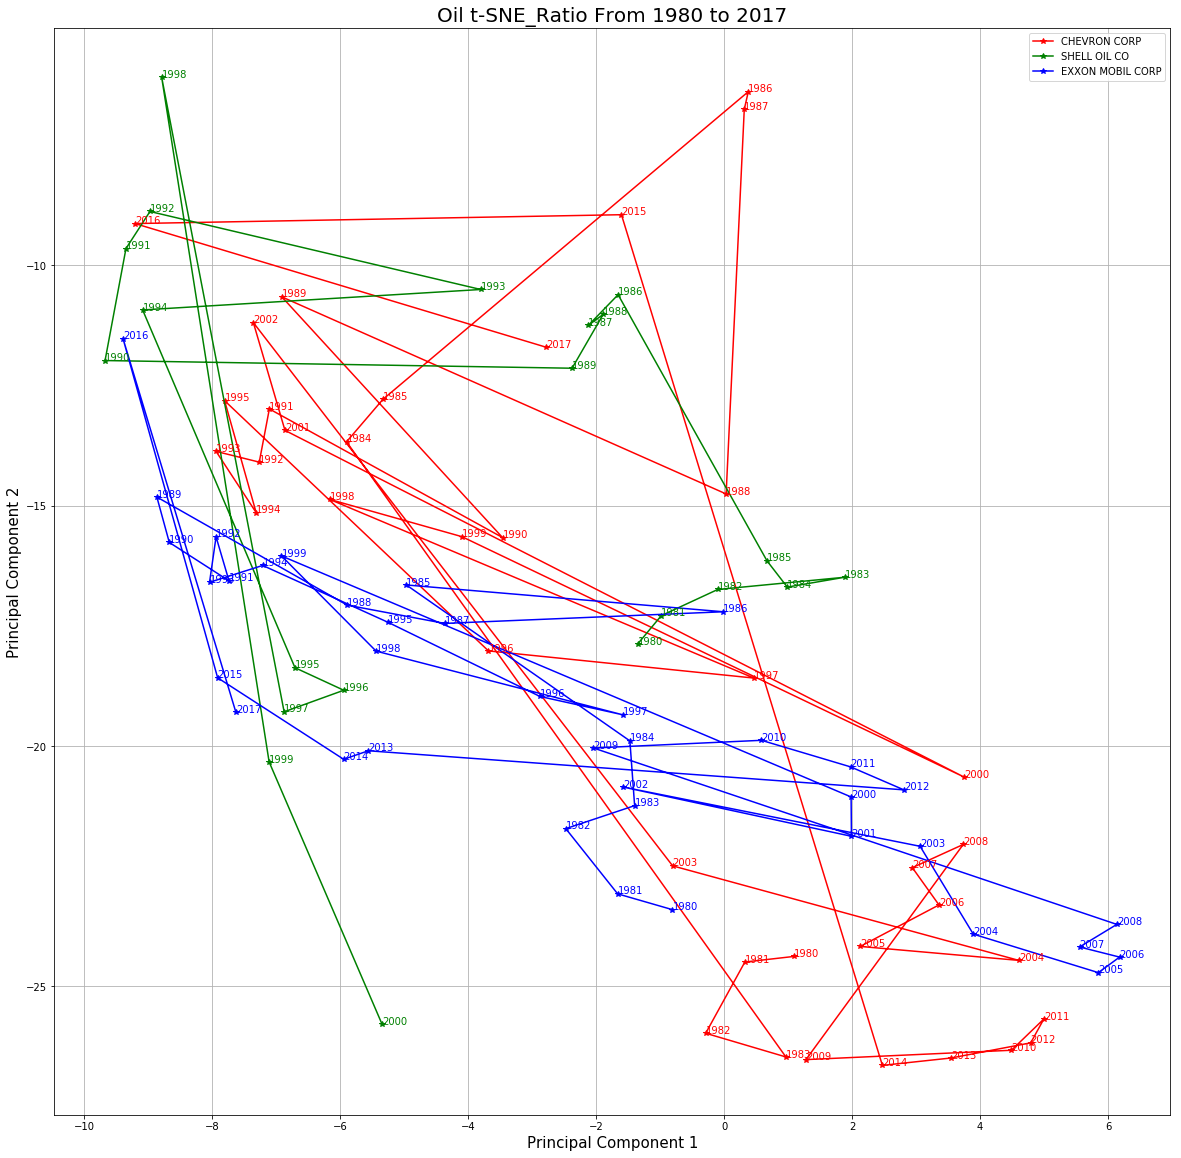

In [52]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Computer Plot

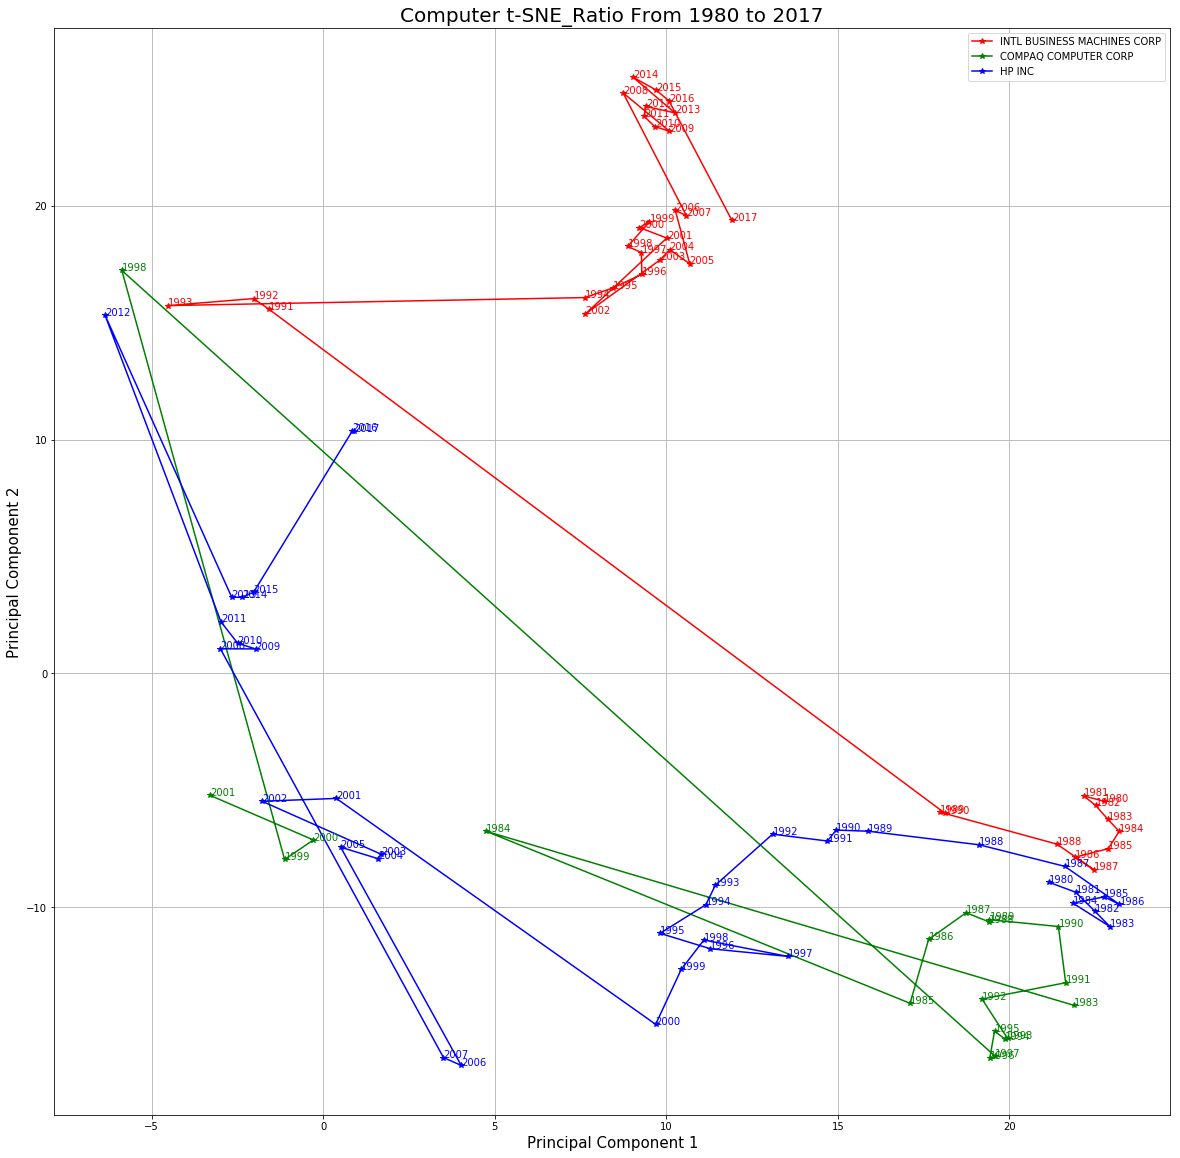

In [53]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Computer t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Computer
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Auto Plot

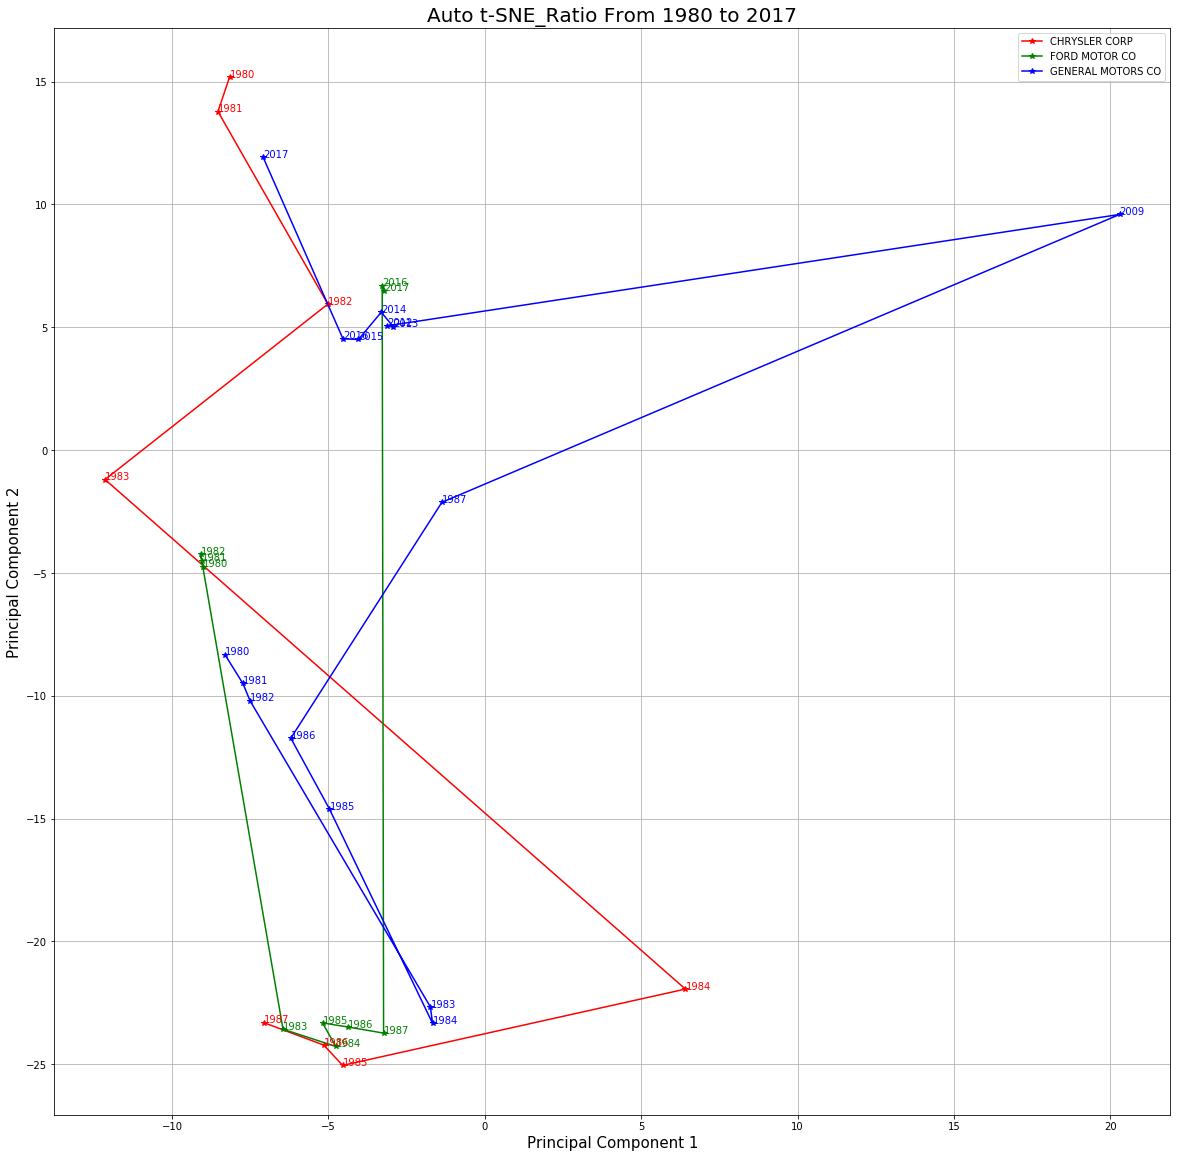

In [54]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Auto t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Auto
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

##  Conglomerate Plot

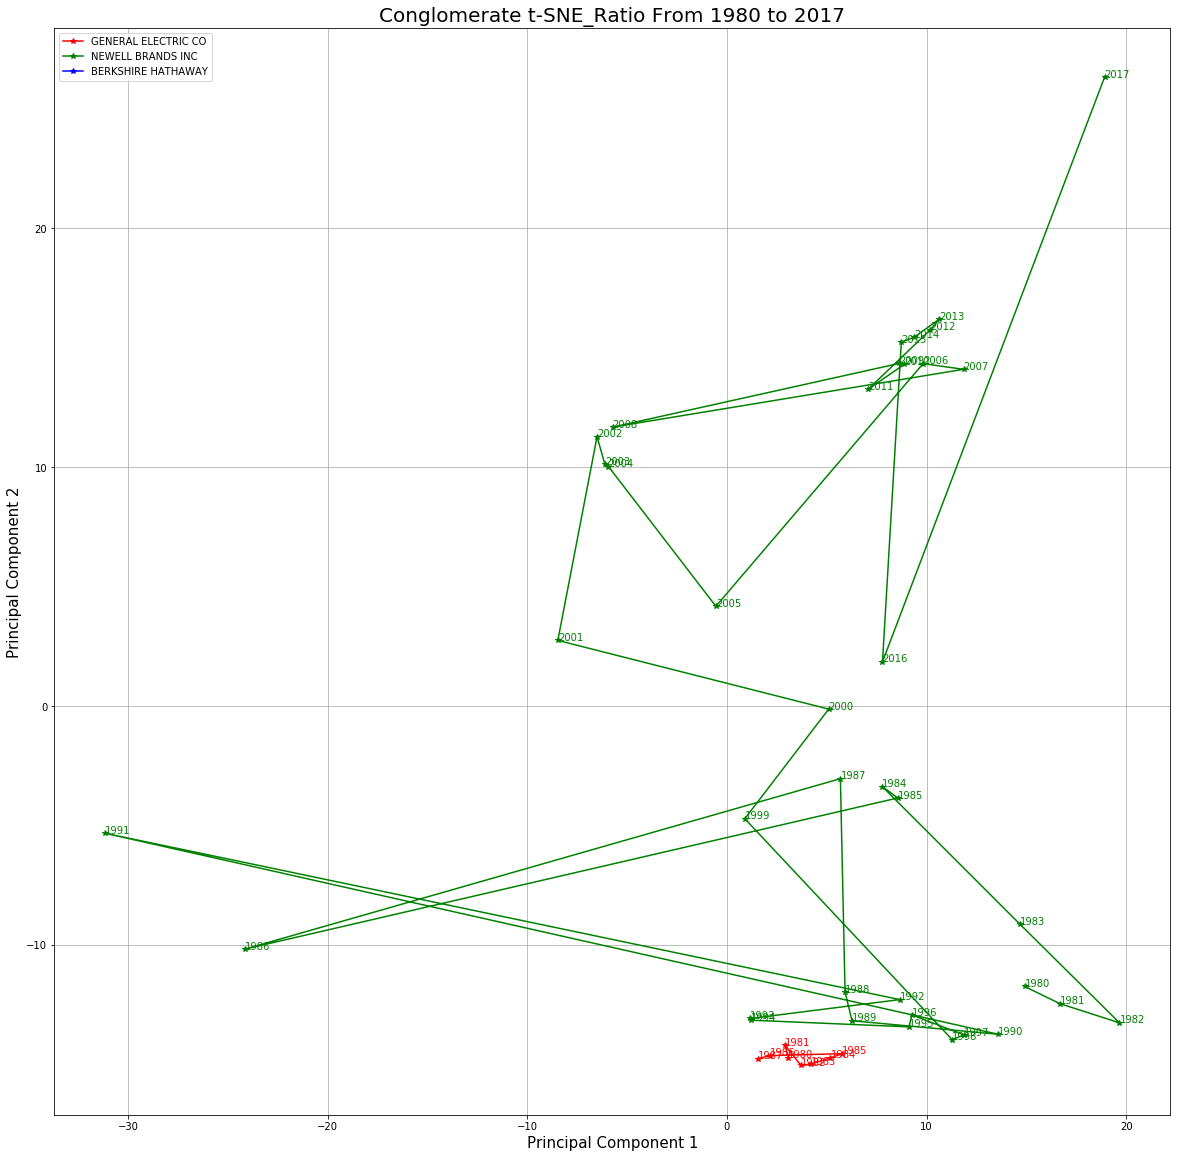

In [55]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Conglomerate t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Conglomerate
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

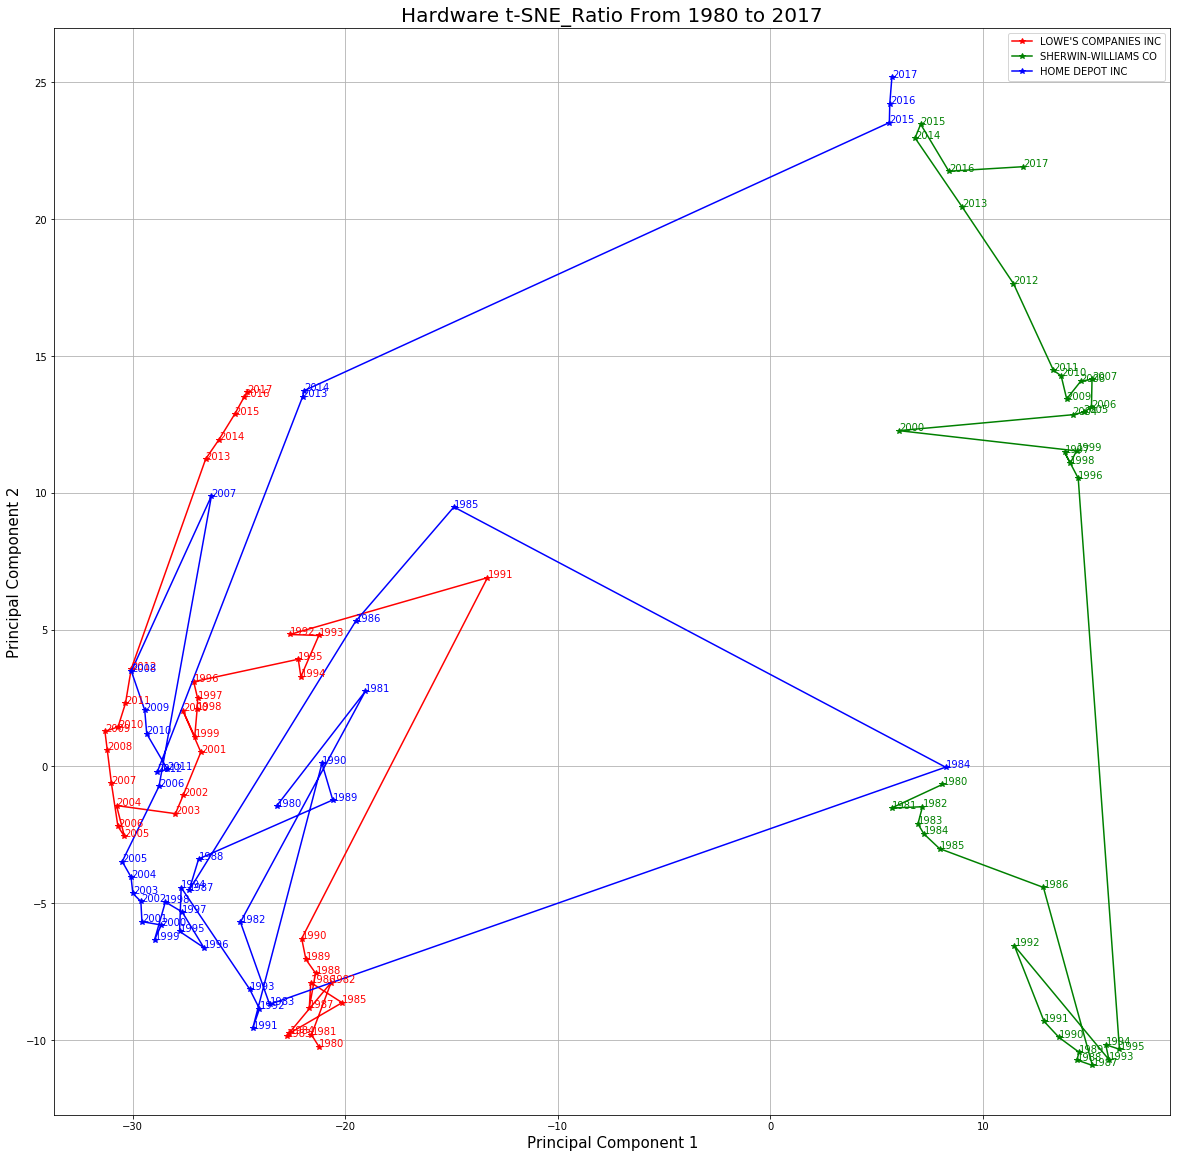

In [56]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Retail Plot 

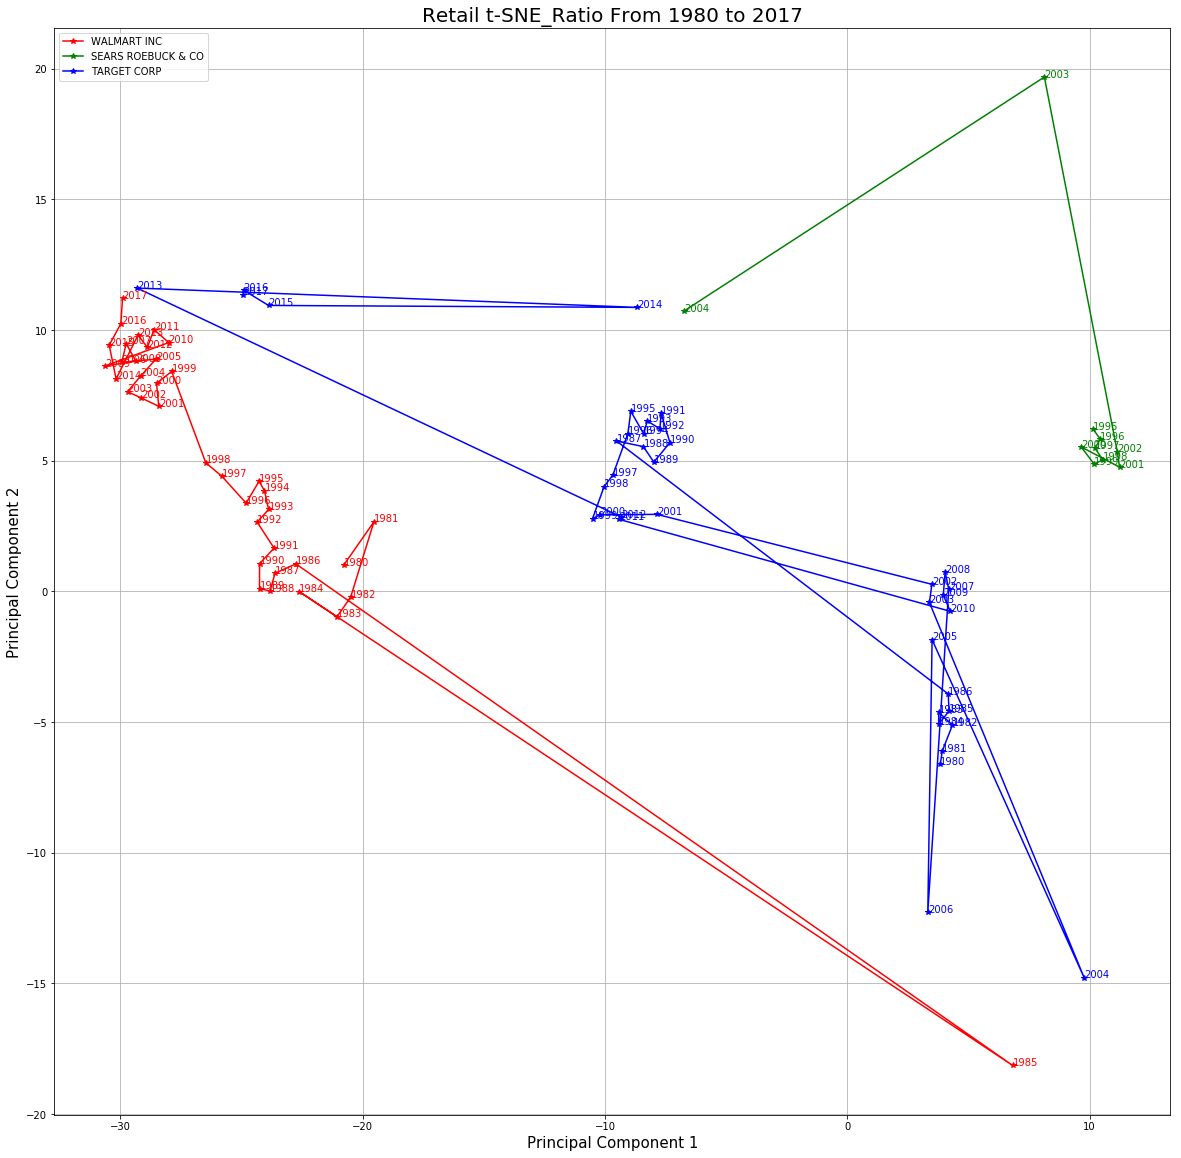

In [57]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Retail t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Retail
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Telecommunication 

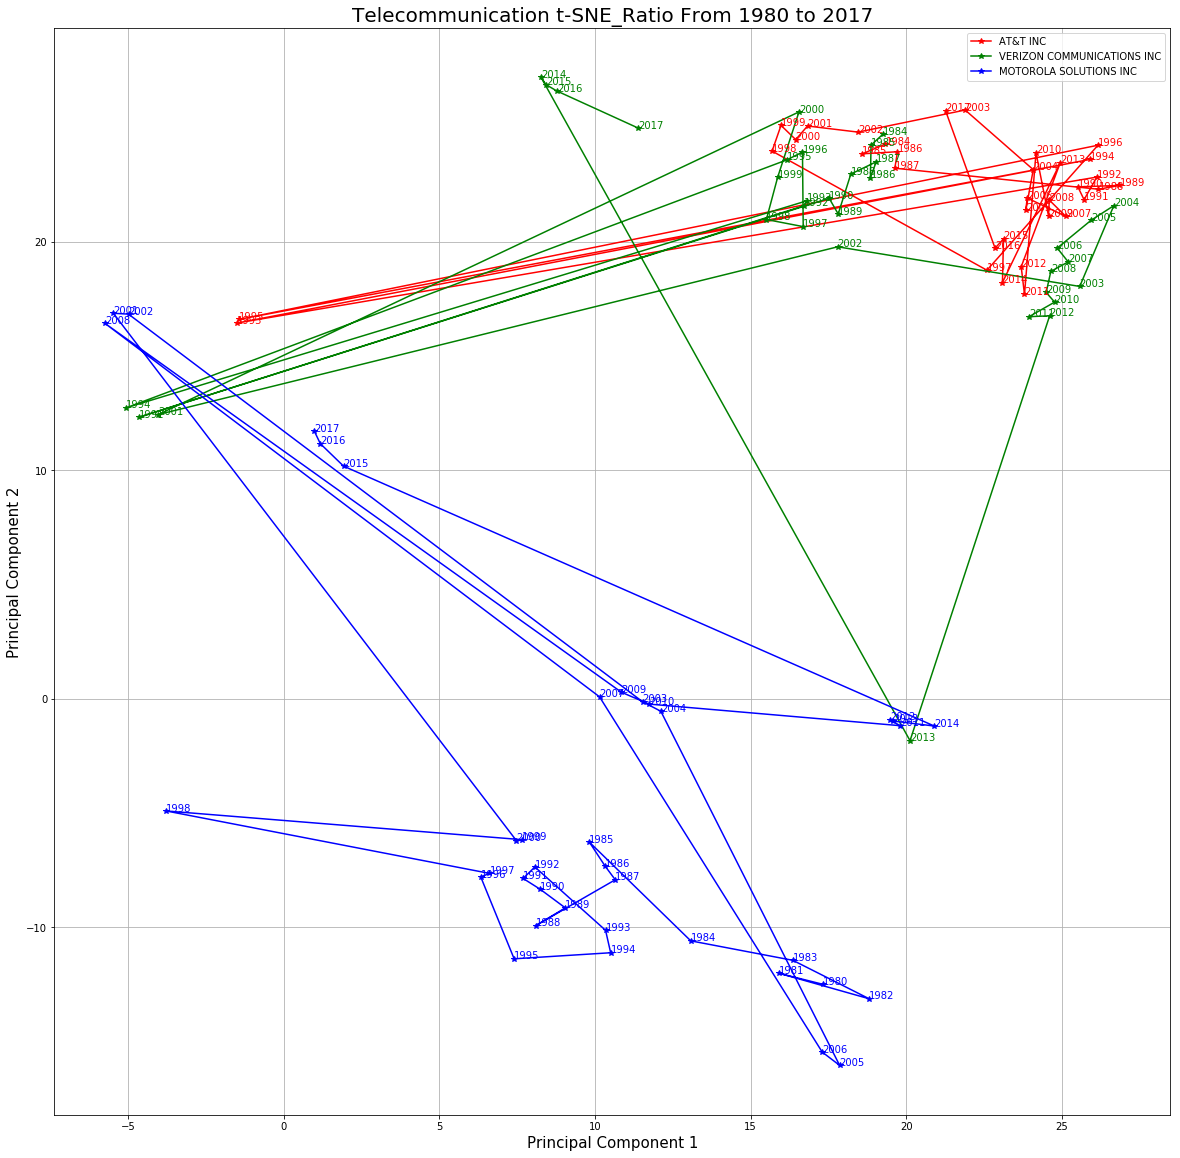

In [58]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Telecommunication t-SNE_Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Telecommunication
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_Ratio['conm'] == company
    plt.plot(tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Euclidean Distance

## 1.  Using PCA

In [59]:
DB_Ratio.head()

gvkey   fyear                        conm       act      ap   invt  \
0  002136  1984.0  VERIZON COMMUNICATIONS INC  2600.400  1290.7  121.8   
1  002136  1985.0  VERIZON COMMUNICATIONS INC  2683.699  1227.1  242.3   
2  002136  1986.0  VERIZON COMMUNICATIONS INC  2755.600  1292.2  270.9   
3  002136  1987.0  VERIZON COMMUNICATIONS INC  2796.600  1523.6  298.6   
4  002136  1988.0  VERIZON COMMUNICATIONS INC  3206.400  1622.3  316.5   

        lct      ebit         at   bkvlps    ...          revt       seq  \
0  2741.200  2114.780  18684.203  75.3744    ...      8090.051  7508.499   
1  2831.899  2331.899  19788.305  79.3134    ...      9084.145  7921.270   
2  3593.800  2470.901  21090.805  41.8186    ...      9920.797  8320.697   
3  3183.800  2357.000  21245.100  44.1303    ...     10298.400  8741.900   
4  4265.200  2406.600  24729.200  46.5787    ...     10880.100  9176.700   

         CR        QR        DT        DE        GM       NPM        RA  \
0  0.948636  0.904203  0.598142  1.488420  0.408981  0.120284  0.052081   
1  0.947668  0.862107  0.599702  1.498130  0.417838  0.120309  0.055230   
2  0.766765  0.691385  0.605486  1.534751  0.437898  0.117642  0.055337   
3  0.878384  0.784597  0.588522  1.430261  0.430902  0.120446  0.058385   
4  0.751758  0.677553  0.628912  1.694781  0.437551  0.121028  0.053249   

         RE  
0  0.129600  
1  0.137970  
2  0.140265  
3  0.141891  
4  0.143494  

[5 rows x 25 columns]

In [60]:
## PCA Data
PCA_Df=FinalDF1

In [61]:
PCA_Df.head()

Principal Component 1  Principal Component 2  \
175              -3.208434              -0.255445   
284               2.770308               0.844557   
574              -0.228065              -0.146125   
137               0.231587               0.180597   
34                0.441485               0.635690   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

In [62]:
# test=FinalDF1.loc[FinalDF1['fyear'] == 1980]
# test

In [63]:
# Ford= test.loc[test['conm']=='FORD MOTOR CO']
# Ford=Ford[['Principal Component 1','Principal Component 2']]
# Chrysler= test.loc[test['conm']=='CHRYSLER CORP']
# Chrysler=Chrysler[['Principal Component 1','Principal Component 2']]


In [64]:
# paired_distances(Ford,Chrysler)

In [65]:
Join_df=pd.merge(PCA_Df, PCA_Df, on='fyear').sort_values(['conm_x','conm_y','fyear'])
Join_df.head()

Principal Component 1_x  Principal Component 2_x    conm_x   fyear  \
1275                 0.669008                -0.441110  AT&T INC  1984.0   
1822                 0.695921                -0.595295  AT&T INC  1985.0   
2075                 0.789256                -0.517780  AT&T INC  1986.0   
2685                 0.745923                -0.723984  AT&T INC  1987.0   
2978                 1.089194                -0.685367  AT&T INC  1988.0   

      Principal Component 1_y  Principal Component 2_y    conm_y  
1275                 0.669008                -0.441110  AT&T INC  
1822                 0.695921                -0.595295  AT&T INC  
2075                 0.789256                -0.517780  AT&T INC  
2685                 0.745923                -0.723984  AT&T INC  
2978                 1.089194                -0.685367  AT&T INC

In [66]:
#Calculating the Euclidean Distance
Join_df['Eucl_Distance']=paired_distances(Join_df[['Principal Component 1_x','Principal Component 2_x']],Join_df[['Principal Component 1_y','Principal Component 2_y']])

Join_df.head()

Principal Component 1_x  Principal Component 2_x    conm_x   fyear  \
1275                 0.669008                -0.441110  AT&T INC  1984.0   
1822                 0.695921                -0.595295  AT&T INC  1985.0   
2075                 0.789256                -0.517780  AT&T INC  1986.0   
2685                 0.745923                -0.723984  AT&T INC  1987.0   
2978                 1.089194                -0.685367  AT&T INC  1988.0   

      Principal Component 1_y  Principal Component 2_y    conm_y  \
1275                 0.669008                -0.441110  AT&T INC   
1822                 0.695921                -0.595295  AT&T INC   
2075                 0.789256                -0.517780  AT&T INC   
2685                 0.745923                -0.723984  AT&T INC   
2978                 1.089194                -0.685367  AT&T INC   

      Eucl_Distance  
1275            0.0  
1822            0.0  
2075            0.0  
2685            0.0  
2978            0.0

In [67]:
#removing companies distance with themselves
Join_df=Join_df[Join_df.Eucl_Distance !=0]
Join_df.head()

Principal Component 1_x  Principal Component 2_x    conm_x   fyear  \
1280                 0.669008                -0.441110  AT&T INC  1984.0   
1823                 0.695921                -0.595295  AT&T INC  1985.0   
2083                 0.789256                -0.517780  AT&T INC  1986.0   
2674                 0.745923                -0.723984  AT&T INC  1987.0   
2980                 1.089194                -0.685367  AT&T INC  1988.0   

      Principal Component 1_y  Principal Component 2_y        conm_y  \
1280                -0.577514                -0.409494  CHEVRON CORP   
1823                -0.672214                -0.201438  CHEVRON CORP   
2083                -0.728736                 0.466443  CHEVRON CORP   
2674                -0.578484                 0.330135  CHEVRON CORP   
2980                -0.106402                -0.263499  CHEVRON CORP   

      Eucl_Distance  
1280       1.246922  
1823       1.423698  
2083       1.809142  
2674       1.692698  
2980       1.267842

In [68]:
Join_df.Eucl_Distance.min(), Join_df.Eucl_Distance.max()

(0.029143546214192816, 19.782255663608332)

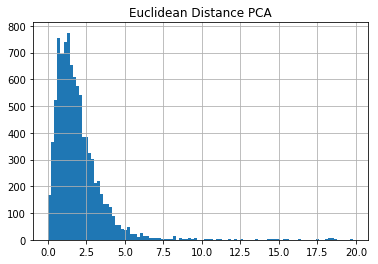

In [69]:
%matplotlib inline
Join_df.Eucl_Distance.hist(bins=100)
plt.title ('Euclidean Distance PCA')
#plt.show()
plt.savefig('Euclidean Distance PCA Histogram')


In [70]:
Join_df.conm_x.unique()

array([u'AT&T INC', u'CHEVRON CORP', u'CHRYSLER CORP',
       u'COMPAQ COMPUTER CORP', u'EXXON MOBIL CORP', u'FORD MOTOR CO',
       u'GENERAL ELECTRIC CO', u'GENERAL MOTORS CO', u'HOME DEPOT INC',
       u'HP INC', u'INTL BUSINESS MACHINES CORP', u"LOWE'S COMPANIES INC",
       u'MOTOROLA SOLUTIONS INC', u'NEWELL BRANDS INC',
       u'SEARS HOLDINGS CORP', u'SEARS ROEBUCK & CO', u'SHELL OIL CO',
       u'SHERWIN-WILLIAMS CO', u'TARGET CORP',
       u'VERIZON COMMUNICATIONS INC', u'WALMART INC'], dtype=object)

In [71]:
Join_df[Join_df.conm_x=='AT&T INC'].sort_values('Eucl_Distance')[:5]

Principal Component 1_x  Principal Component 2_x    conm_x   fyear  \
1278                 0.669008                -0.441110  AT&T INC  1984.0   
7534                 0.529596                -0.832006  AT&T INC  2006.0   
2683                 0.745923                -0.723984  AT&T INC  1987.0   
1817                 0.695921                -0.595295  AT&T INC  1985.0   
5409                -0.016628                -1.051231  AT&T INC  1997.0   

      Principal Component 1_y  Principal Component 2_y  \
1278                 0.664845                -0.412266   
7534                 0.445113                -0.767499   
2683                 0.717639                -0.620593   
1817                 0.691600                -0.478000   
5409                -0.057662                -0.878338   

                          conm_y  Eucl_Distance  
1278  VERIZON COMMUNICATIONS INC       0.029144  
7534        LOWE'S COMPANIES INC       0.106294  
2683  VERIZON COMMUNICATIONS INC       0.107190  
1817  VERIZON COMMUNICATIONS INC       0.117374  
5409                SHELL OIL CO       0.177695

## Plotting Pair Distances

## AT&T and Verizon

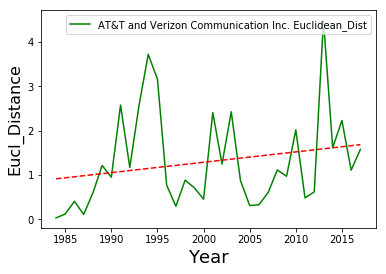

In [72]:
import matplotlib.pyplot as plt
subdf = Join_df[(Join_df.conm_x=='AT&T INC')&(Join_df.conm_y=='VERIZON COMMUNICATIONS INC')].sort_values('fyear')
x = subdf['fyear']
y = subdf['Eucl_Distance']
plt.plot(x, y, color='Green')
plt.legend(['AT&T and Verizon Communication Inc. Euclidean_Dist'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Eucl_Distance', fontsize=16)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()


## Euclidean Distance Plot Function

In [73]:
### Companies ###

Telecommunication = ['AT&T INC','VERIZON COMMUNICATIONS INC','MOTOROLA SOLUTIONS INC']
Oil = ['CHEVRON CORP','SHELL OIL CO','EXXON MOBIL CORP']
Auto =['CHRYSLER CORP','FORD MOTOR CO','GENERAL MOTORS CO']
Hardware = ["LOWE'S COMPANIES INC",'SHERWIN-WILLIAMS CO','HOME DEPOT INC']
Retail = ['WALMART INC','SEARS ROEBUCK & CO','TARGET CORP']
Conglomerate = ['GENERAL ELECTRIC CO','NEWELL BRANDS INC','BERKSHIRE HATHAWAY']
Computer = ['INTL BUSINESS MACHINES CORP','COMPAQ COMPUTER CORP','HP INC']



In [74]:
def DistancePlot(df,comp_1='name1', comp_2='name2' ):
    subdf = df[(df.conm_x==comp_1)&(df.conm_y==comp_2)].sort_values('fyear')
    x = subdf['fyear']
    y = subdf['Eucl_Distance']
    plt.plot(x, y,'x-', color='Green')
    plt.title([comp_1, comp_2])
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Eucl_Distance', fontsize=16)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    
    
    plt.show()
    

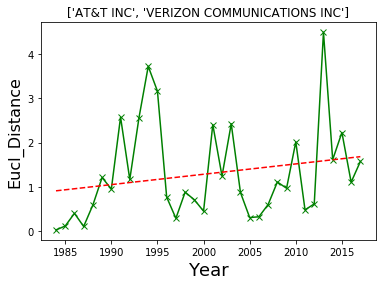

In [75]:
DistancePlot(Join_df,comp_1='AT&T INC', comp_2='VERIZON COMMUNICATIONS INC') 

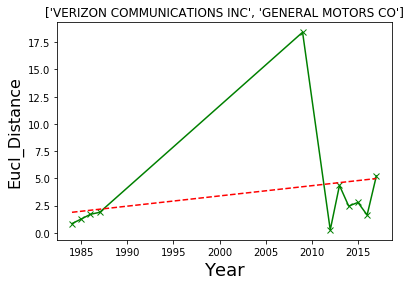

In [76]:
DistancePlot(Join_df,comp_1='VERIZON COMMUNICATIONS INC', comp_2='GENERAL MOTORS CO')

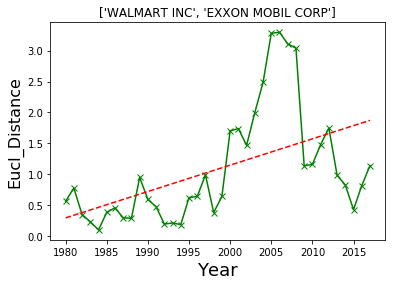

In [77]:
DistancePlot(Join_df,comp_1='WALMART INC', comp_2='EXXON MOBIL CORP')

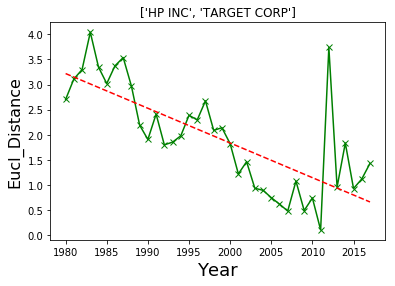

In [78]:
DistancePlot(Join_df,comp_1='HP INC', comp_2='TARGET CORP')

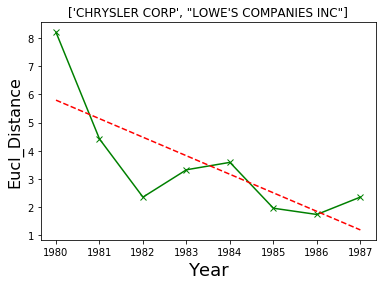

In [79]:
DistancePlot(Join_df,comp_1='CHRYSLER CORP', comp_2="LOWE'S COMPANIES INC")

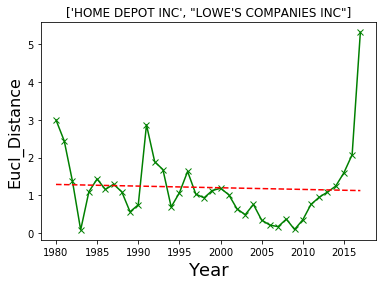

In [80]:
DistancePlot(Join_df,comp_1='HOME DEPOT INC', comp_2="LOWE'S COMPANIES INC")

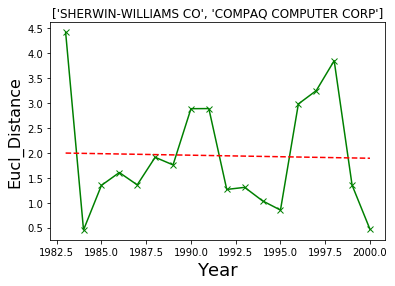

In [81]:
DistancePlot(Join_df,comp_1='SHERWIN-WILLIAMS CO', comp_2='COMPAQ COMPUTER CORP')

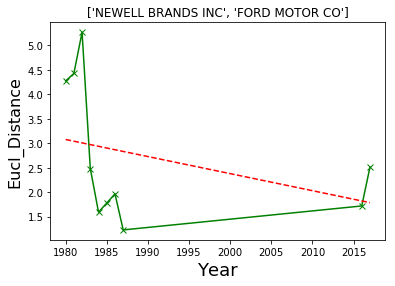

In [82]:
DistancePlot(Join_df,comp_1='NEWELL BRANDS INC', comp_2='FORD MOTOR CO')

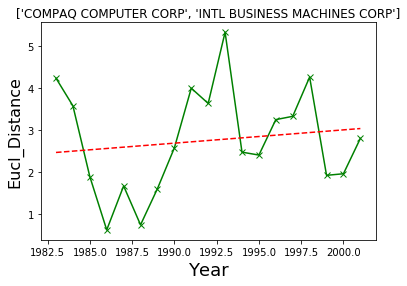

In [83]:
DistancePlot(Join_df,comp_1='COMPAQ COMPUTER CORP', comp_2='INTL BUSINESS MACHINES CORP')

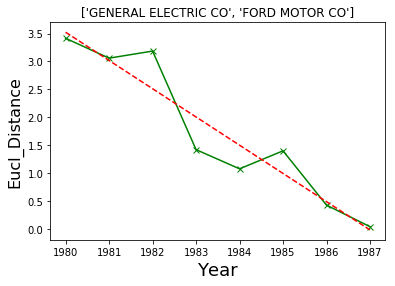

In [84]:
DistancePlot(Join_df,comp_1='GENERAL ELECTRIC CO', comp_2='FORD MOTOR CO')

In [85]:
AllCompany = ['AT&T INC','VERIZON COMMUNICATIONS INC','MOTOROLA SOLUTIONS INC','CHEVRON CORP','SHELL OIL CO',
              'EXXON MOBIL CORP','CHRYSLER CORP','FORD MOTOR CO','GENERAL MOTORS CO',
        "LOWE'S COMPANIES INC",'GENERAL ELECTRIC CO','HOME DEPOT INC','WALMART INC',
              'SEARS ROEBUCK & CO','TARGET CORP','GENERAL ELECTRIC CO',
              'NEWELL BRANDS INC','INTL BUSINESS MACHINES CORP'
              ,'COMPAQ COMPUTER CORP','HP INC']



In [86]:
#Join_df[Join_df.conm_x=='AT&T INC'].sort_values('Eucl_Distance')[:5]
Join_df.groupby(['conm_x', 'conm_y']).agg({'Eucl_Distance': 'mean'}) \
    .reset_index() \
    .sort_values(['conm_x','Eucl_Distance']).head()

conm_x                      conm_y  Eucl_Distance
5   AT&T INC         GENERAL ELECTRIC CO       0.732313
4   AT&T INC               FORD MOTOR CO       1.197420
1   AT&T INC               CHRYSLER CORP       1.224282
18  AT&T INC  VERIZON COMMUNICATIONS INC       1.297516
19  AT&T INC                 WALMART INC       1.384797

In [87]:
stats_df = Join_df.groupby(['conm_x', 'conm_y']).agg({'Eucl_Distance': ['mean', 'var']}).reset_index()
stats_df.columns = ['conm_x', 'conm_y', 'dist_mean', 'dist_var']### stats_df.columns.droplevel()
stats_df.sort_values(['conm_x','dist_mean']).head()

conm_x                      conm_y  dist_mean  dist_var
5   AT&T INC         GENERAL ELECTRIC CO   0.732313  0.017916
4   AT&T INC               FORD MOTOR CO   1.197420  0.418062
1   AT&T INC               CHRYSLER CORP   1.224282  0.517222
18  AT&T INC  VERIZON COMMUNICATIONS INC   1.297516  1.186584
19  AT&T INC                 WALMART INC   1.384797  0.355193

In [88]:
#make pivot table . pivot or pivot_table in pandas
#then export it to excel and do a conditional formatting to plot it or heatmap or even heatmap over years
#interactive plot and use a slider for years and see the evolution of distances
#seaborn package for heatmap 

In [89]:
Join_df.head()

Principal Component 1_x  Principal Component 2_x    conm_x   fyear  \
1280                 0.669008                -0.441110  AT&T INC  1984.0   
1823                 0.695921                -0.595295  AT&T INC  1985.0   
2083                 0.789256                -0.517780  AT&T INC  1986.0   
2674                 0.745923                -0.723984  AT&T INC  1987.0   
2980                 1.089194                -0.685367  AT&T INC  1988.0   

      Principal Component 1_y  Principal Component 2_y        conm_y  \
1280                -0.577514                -0.409494  CHEVRON CORP   
1823                -0.672214                -0.201438  CHEVRON CORP   
2083                -0.728736                 0.466443  CHEVRON CORP   
2674                -0.578484                 0.330135  CHEVRON CORP   
2980                -0.106402                -0.263499  CHEVRON CORP   

      Eucl_Distance  
1280       1.246922  
1823       1.423698  
2083       1.809142  
2674       1.692698  
2980       1.267842

In [90]:
AllCompany = ['AT&T INC','VERIZON COMMUNICATIONS INC','MOTOROLA SOLUTIONS INC','CHEVRON CORP','SHELL OIL CO',
              'EXXON MOBIL CORP','CHRYSLER CORP','FORD MOTOR CO','GENERAL MOTORS CO',
        "LOWE'S COMPANIES INC",'SHERWIN-WILLIAMS CO','HOME DEPOT INC','WALMART INC',
              'SEARS ROEBUCK & CO','TARGET CORP','GENERAL ELECTRIC CO',
              'NEWELL BRANDS INC','INTL BUSINESS MACHINES CORP'
              ,'COMPAQ COMPUTER CORP','HP INC']


In [91]:
Join_df['fyear'].nunique()


38

In [92]:
# AllCompany
# table = Join_df.pivot_table('Eucl_Distance', columns='conm_x', index='fyear', aggfunc='mean')
# data = [table[i] for i in AllCompany]
# data = np.array(data)
# #data = pd.DataFrame(np.reshape(data, (19, 38)))
# years = table.index.astype(int)

# plt.figure(figsize=(12,8))
# ax = sns.heatmap(data, cmap='viridis')
# ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
# ax.set_yticklabels(labels = AllCompany[::-1], fontsize=14, rotation=0)
# ax.set_xlabel(xlabel='Year', fontsize=16)
# ax.set_ylabel(ylabel='conm_x', fontsize=16)
# ax.set_title(label='Average Revenue Per Game in $ Millions of Top 10 Publishers', fontsize=20)
# plt.show();

# 2. t-Distributed Stochastic Neighbouring Entities (t-SNE) 

In [93]:
Tdistr_DF=tsNEDF_Final1
Tdistr_DF.head()

Principal Component 1  Principal Component 2  \
175              -9.010839              -4.738486   
284              22.765306              -5.471000   
574             -20.774567               1.013631   
137              -0.808549             -23.404922   
34                1.085947             -24.379110   

                            conm   fyear  
175                FORD MOTOR CO  1980.0  
284  INTL BUSINESS MACHINES CORP  1980.0  
574                  WALMART INC  1980.0  
137             EXXON MOBIL CORP  1980.0  
34                  CHEVRON CORP  1980.0

In [94]:
Join_df2=pd.merge(Tdistr_DF, Tdistr_DF, on='fyear').sort_values(['conm_x','conm_y','fyear'])
Join_df2['Eucl_Distance']=paired_distances(Join_df2[['Principal Component 1_x','Principal Component 2_x']],
                                          Join_df2[['Principal Component 1_y','Principal Component 2_y']])
Join_df2=Join_df2[Join_df2.Eucl_Distance !=0]
Join_df2.head()


Principal Component 1_x  Principal Component 2_x    conm_x   fyear  \
1280                19.329988                24.267672  AT&T INC  1984.0   
1823                18.587236                23.840469  AT&T INC  1985.0   
2083                19.716391                23.931934  AT&T INC  1986.0   
2674                19.630703                23.210863  AT&T INC  1987.0   
2980                26.170418                22.289808  AT&T INC  1988.0   

      Principal Component 1_y  Principal Component 2_y        conm_y  \
1280                -5.902371               -13.670824  CHEVRON CORP   
1823                -5.334136               -12.787966  CHEVRON CORP   
2083                 0.377562                -6.386476  CHEVRON CORP   
2674                 0.314654                -6.753175  CHEVRON CORP   
2980                 0.031035               -14.755933  CHEVRON CORP   

      Eucl_Distance  
1280      45.563160  
1823      43.747845  
2083      35.961037  
2674      35.650433  
2980      45.339325

In [95]:
Join_df2.Eucl_Distance.max(), Join_df2.Eucl_Distance.min()

(63.01611, 0.4291112)

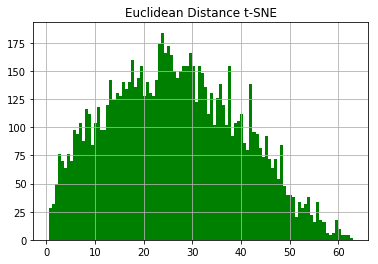

In [96]:
%matplotlib inline
Join_df2.Eucl_Distance.hist(bins=100, color='green')
plt.title ('Euclidean Distance t-SNE')
#plt.show()
plt.savefig('Euclidean Distance t-SNE')


In [97]:
def DistancePlot(df,comp_1='name1', comp_2='name2' ):
    subdf = df[(df.conm_x==comp_1)&(df.conm_y==comp_2)].sort_values('fyear')
    x = subdf['fyear']
    y = subdf['Eucl_Distance']
    plt.plot(x, y, color='Green')
    plt.title([comp_1, comp_2])
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Eucl_Distance', fontsize=16)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")

    plt.show()
    

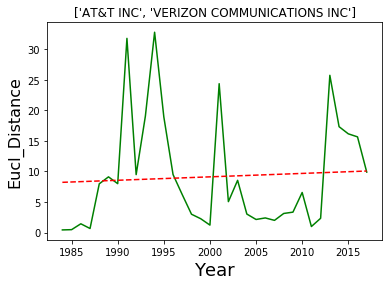

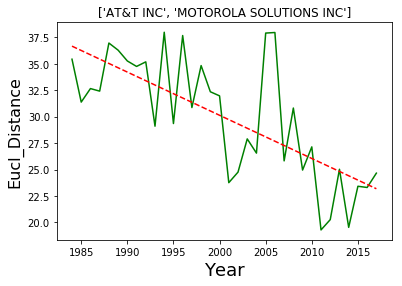

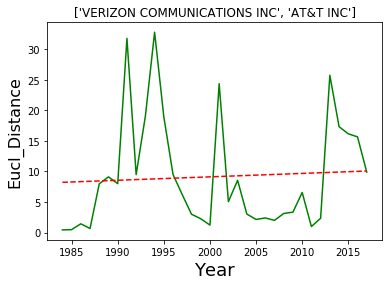

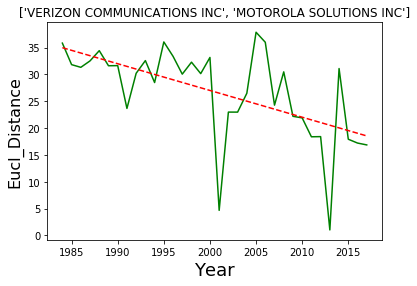

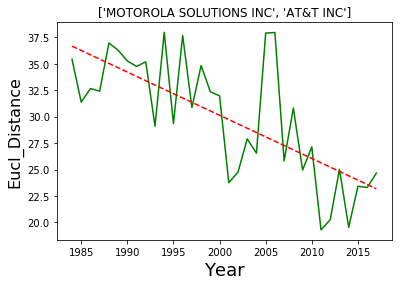

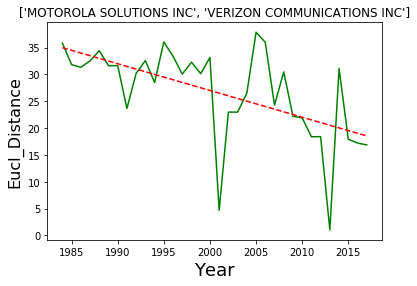

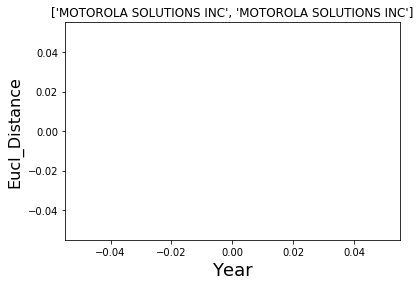

In [98]:
#Loop or plots

for i in CompanyList: 
    for j in CompanyList: 
        try:
            DistancePlot(Join_df2, comp_1 = i, comp_2 = j)
        except TypeError: 
            pass

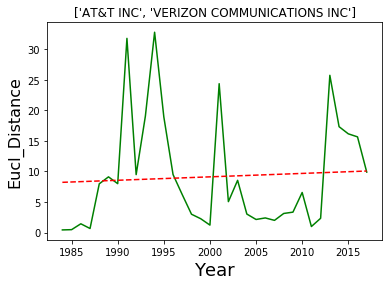

In [99]:
DistancePlot(Join_df2, comp_1 = CompanyList[0], comp_2 = CompanyList[1])

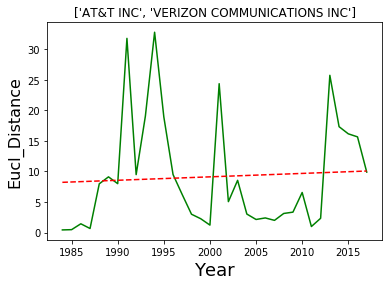

In [100]:
DistancePlot(Join_df2,comp_1='AT&T INC', comp_2='VERIZON COMMUNICATIONS INC')

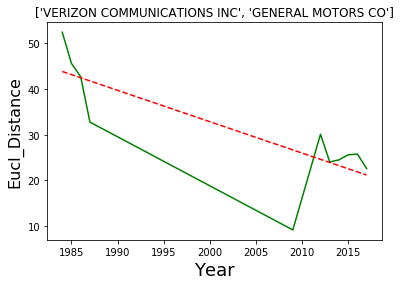

In [101]:
DistancePlot(Join_df2,comp_1='VERIZON COMMUNICATIONS INC', comp_2='GENERAL MOTORS CO')

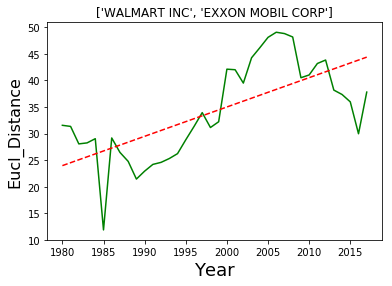

In [102]:
DistancePlot(Join_df2,comp_1='WALMART INC', comp_2='EXXON MOBIL CORP')

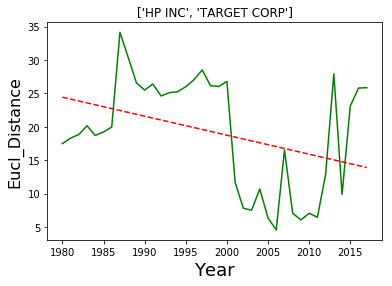

In [103]:
DistancePlot(Join_df2,comp_1='HP INC', comp_2='TARGET CORP')

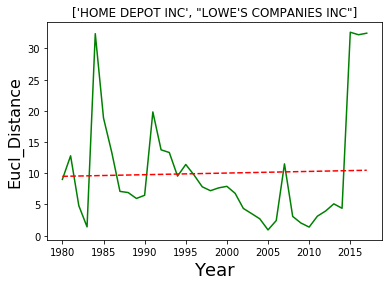

In [104]:
DistancePlot(Join_df2,comp_1='HOME DEPOT INC', comp_2="LOWE'S COMPANIES INC")

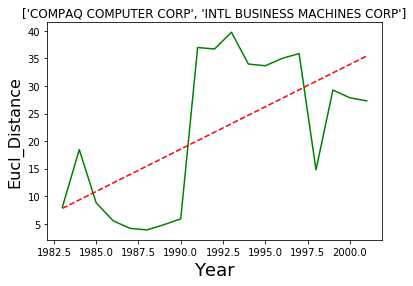

In [105]:
DistancePlot(Join_df2,comp_1='COMPAQ COMPUTER CORP', comp_2='INTL BUSINESS MACHINES CORP')

# Pivot Table

In [106]:
table_mean=Join_df.pivot_table('Eucl_Distance', columns='conm_x', index='conm_y', aggfunc='mean', fill_value=0)
table_mean.to_excel("Eucl_Table_Mean.xlsx")

In [107]:
%%sh
open Eucl_Table_Mean.xlsx

In [108]:
table_mean.head()

conm_x                AT&T INC  CHEVRON CORP  CHRYSLER CORP  \
conm_y                                                        
AT&T INC              0.000000      1.736110       1.224282   
CHEVRON CORP          1.736110      0.000000       3.151258   
CHRYSLER CORP         1.224282      3.151258       0.000000   
COMPAQ COMPUTER CORP  3.278123      3.134313       3.932860   
EXXON MOBIL CORP      1.405315      0.898125       2.619954   

conm_x                COMPAQ COMPUTER CORP  EXXON MOBIL CORP  FORD MOTOR CO  \
conm_y                                                                        
AT&T INC                          3.278123          1.405315       1.197420   
CHEVRON CORP                      3.134313          0.898125       1.628448   
CHRYSLER CORP                     3.932860          2.619954       1.672701   
COMPAQ COMPUTER CORP              0.000000          3.290833       2.990637   
EXXON MOBIL CORP                  3.290833          0.000000       1.243850   

conm_x                GENERAL ELECTRIC CO  GENERAL MOTORS CO  HOME DEPOT INC  \
conm_y                                                                         
AT&T INC                         0.732313           3.014753        1.557173   
CHEVRON CORP                     0.972191           2.613326        1.667982   
CHRYSLER CORP                    2.833920           2.308172        3.457321   
COMPAQ COMPUTER CORP             2.429705           2.764565        2.606341   
EXXON MOBIL CORP                 0.522185           2.307119        1.416779   

conm_x                  HP INC     ...       LOWE'S COMPANIES INC  \
conm_y                             ...                              
AT&T INC              2.107542     ...                   1.474841   
CHEVRON CORP          2.029338     ...                   1.261610   
CHRYSLER CORP         5.656819     ...                   3.492472   
COMPAQ COMPUTER CORP  1.995851     ...                   2.865589   
EXXON MOBIL CORP      2.083707     ...                   1.211237   

conm_x                MOTOROLA SOLUTIONS INC  NEWELL BRANDS INC  \
conm_y                                                            
AT&T INC                            3.038923           1.709249   
CHEVRON CORP                        1.931607           1.546359   
CHRYSLER CORP                       4.032005           4.080949   
COMPAQ COMPUTER CORP                2.108173           2.131097   
EXXON MOBIL CORP                    2.370993           1.701548   

conm_x                SEARS HOLDINGS CORP  SEARS ROEBUCK & CO  SHELL OIL CO  \
conm_y                                                                        
AT&T INC                         3.331665            2.646182      1.646241   
CHEVRON CORP                     2.601521            1.890502      0.911836   
CHRYSLER CORP                    2.481479            0.000000      2.802803   
COMPAQ COMPUTER CORP             3.851492            1.947038      3.069192   
EXXON MOBIL CORP                 2.674128            1.697131      0.869853   

conm_x                SHERWIN-WILLIAMS CO  TARGET CORP  \
conm_y                                                   
AT&T INC                         1.544000     1.647232   
CHEVRON CORP                     1.634024     1.080340   
CHRYSLER CORP                    3.308082     2.997999   
COMPAQ COMPUTER CORP             1.944717     3.213996   
EXXON MOBIL CORP                 1.531226     1.042682   

conm_x                VERIZON COMMUNICATIONS INC  WALMART INC  
conm_y                                                         
AT&T INC                                1.297516     1.384797  
CHEVRON CORP                            1.629691     1.397250  
CHRYSLER CORP                           1.195218     2.509059  
COMPAQ COMPUTER CORP                    3.414974     3.280600  
EXXON MOBIL CORP                        1.440641     1.082711  

[5 rows x 21 columns]

In [109]:
# ## OR
# table_mean1= pd.pivot_table(Join_df, index='conm_y', columns='conm_x', values='Eucl_Distance', aggfunc='mean')
# table_mean1.head()

In [110]:
table_stdv= Join_df.pivot_table('Eucl_Distance', columns='conm_x', index='conm_y', aggfunc='var', fill_value=0)
table_stdv.to_excel("Eucl_Table_Stdv.xlsx")

In [149]:
%%sh
open Eucl_Table_Stdv.xlsx 

In [ ]:
# note: try pca with one single component
# plot it and see how it will look like
#Latex to research document/ academic paper
#metric to kinda see how close companies are
#are they moving together? 
#maybe interactive plot over year?
#scatterplot matrix


In [146]:
## load just a few rows of the table to get the colum names
comp_funda = db.raw_sql("SELECT * FROM comp.funda LIMIT 10")
# print comp_funda.shape
# print ', '.join(comp_funda.columns)

## list of columns
comp_funda_cols = comp_funda.columns

coverage = {}
for j in range(0, len(comp_funda_cols), 20):
    print j
    q = """
    SELECT {}
    FROM comp.funda
    WHERE fyear=2017
    """.format(', '.join(
        map(lambda s: '"%s"'%s, comp_funda_cols[j:j+20])
    ))
#     print q
    df = db.raw_sql(q)
#     df.describe()
    for col in comp_funda_cols[j:j+20]:
        coverage[col] = 1.0*pd.notnull(df[col]).sum()/df.shape[0]
#         

In [144]:
for col in comp_funda_cols[j:j+20]:
        coverage[col] = 1.0*pd.notnull(df[col]).sum()/df.shape[0]
        print coverage
        

{u'sco': 0.024252223120452707, u'invt': 0.4390191323093506, u'upmsubp': 0.02673133926165454, u'cprei': 0.005227701428186473, u'gp': 0.4248450552411749, u'scf': 0.42419832929129614, u'txtubend': 0.19892212341686877, u'compst': 0.079655079493398, u'ibbl': 0.003826461870115872, u'pppabl': 0.003287523578550256, u'rlo': 0.007275666936135812, u'lcast': 0.0022096469954190246, u'vpo': 0.05669630827270278, u'xindc': 0.013635138776610078, u'banlr': 0.0028024791161412018, u'pncwia': 0.00016168148746968473, u'utfdoc': 0.0, u'spioa': 0.07458905955268122, u'fyear': 1.0, u'ciother': 0.42225815144165996, u'esopnr': 0.3801670708703853, u'prch_f': 0.9293990838049043, u'upmpfs': 0.027593640528159526, u'tf': 0.038911344651037454, u'oibdp': 0.4116410670978173, u'aul3': 0.25745082188089463, u'spiop': 0.07528967933171651, u'cidergl': 0.42026407976286717, u'prcaeps': 0.0005389382915656157, u'pncwieps': 0.00016168148746968473, u'lct': 0.36825653462678526, u'prsho': 0.42479116141201834, u'xopr': 0.4248450552411

In [ ]:
### Additinal Features ###


In [147]:
# Cash Dividends on Common Stock (cdvc) cdvc': 0.014281864726488817
# Depreciation and Amortization (dp) dp': 0.8020479655079493
# Earnings Per Share (Basic) - Including Extraordinary Items(epspi) epspi': 0.7473996227431959
# Intangible Assets - Total (intan) intan': 0.47846941525195363
# Property, Plant and Equipment - Total (Gross) (ppegt) ppegt': 0.38981406628940984
#Market Value - Total - Fiscal (mkvalt) mkvalt': 0.7143088116410671
#Property, Plant and Equipment - Total (Net) (ppent) ppent': 0.8132039881433576
#

In [ ]:
# suggestion: using growth rate?
